## KNN Classifier


### Heart failure dataset
We will be starting with the Heart failure dataset with the original values

### Imports and data loading

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../../datasets/heart_failure_clinical_records_dataset.csv')

### Train and test split


In [38]:
y: np.ndarray = data.pop('DEATH_EVENT').values # Target Variable
X: np.ndarray = data.values # Values of each feature on each record
labels = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

In [39]:
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = ['manhattan', 'euclidean', 'chebyshev']

{'manhattan': [25, KNeighborsClassifier(metric='manhattan', n_neighbors=25), 0.6751724137931034], 'euclidean': [23, KNeighborsClassifier(metric='euclidean', n_neighbors=23), 0.6786206896551724], 'chebyshev': [25, KNeighborsClassifier(metric='chebyshev', n_neighbors=25), 0.6788505747126437]}


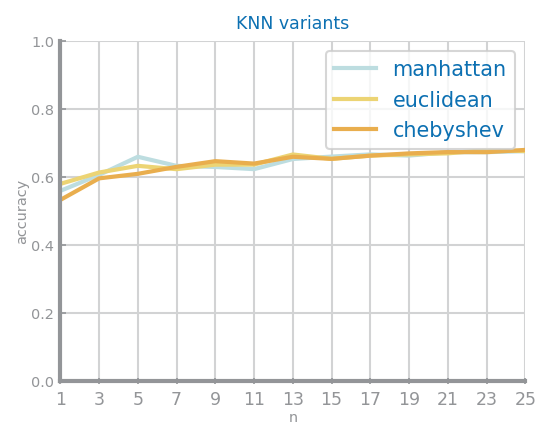

Best results with 25 neighbors and chebyshev


In [40]:
values = {}
best = (0, '')
best_model = None
last_best = 0
dists = {'manhattan': None, 'euclidean':None, 'chebyshev':None}
for d in dist:
    b_f_d=["","",0]
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        scores = cross_val_score(knn, X, y, cv=kf)
        yvalues.append(scores.mean())
        if scores.mean() > last_best:
            best = (n, d)
            last_best = scores.mean()
            best_model
        if scores.mean() > b_f_d[2]:
            b_f_d = [n,knn,yvalues[-1]]
    dists[d] = b_f_d
    values[d] = yvalues

print(dists)
plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

We can now see above, the results aren't as "jumpy" and a lot more consistent. They also seem worse, but now they are a lot more reliable since they won't get good or bad depending on the way the data was divided.

For the manhattan distance best was 25 k with an acc of 67.52% 
Lets see how it did for each fold



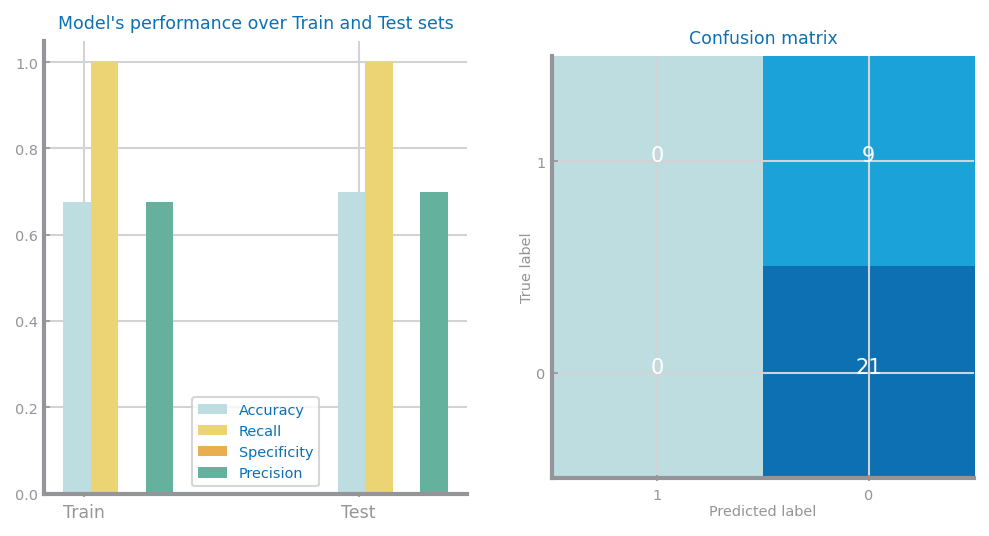

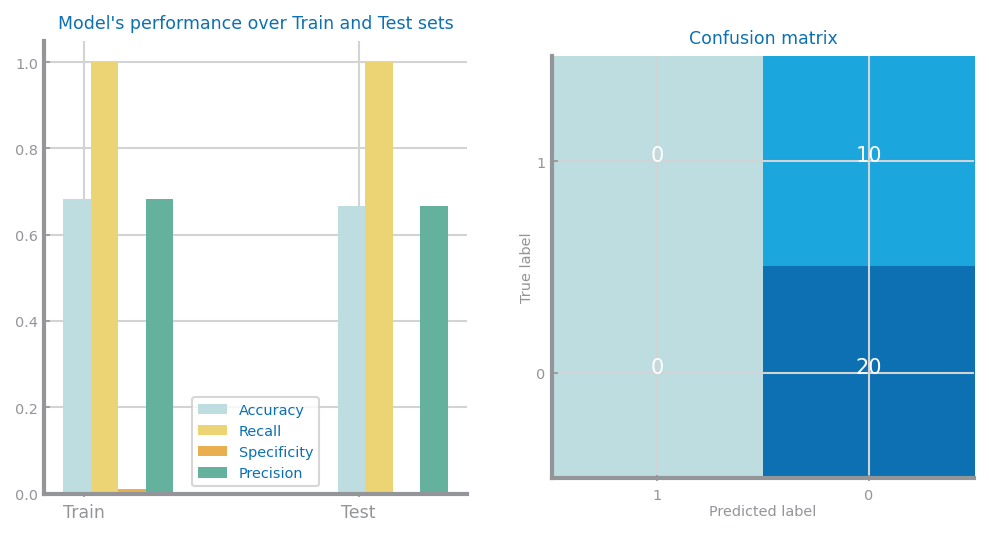

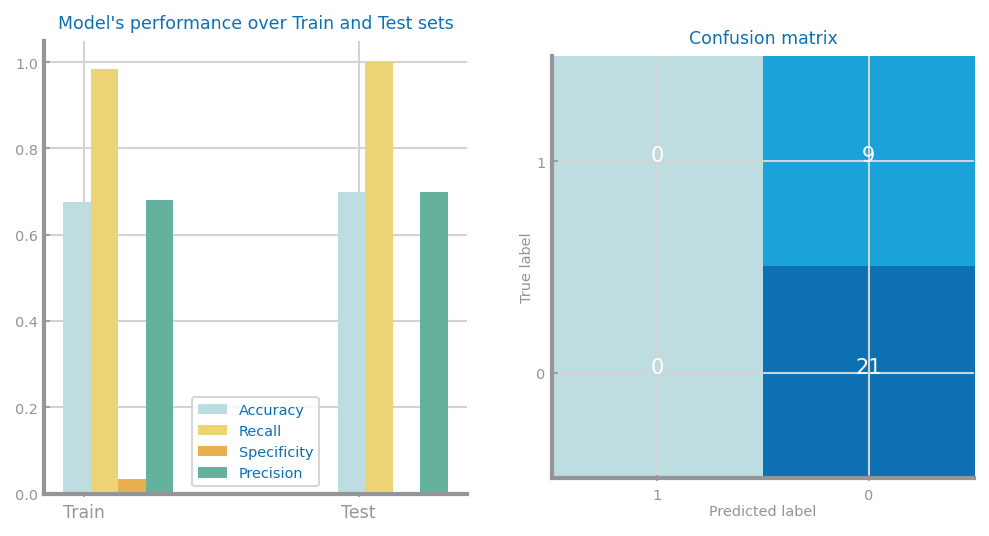

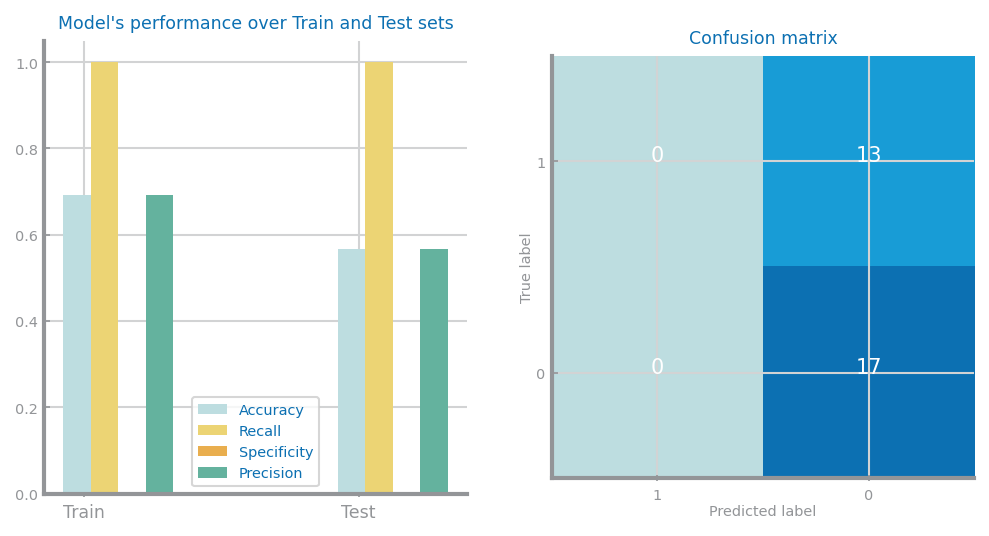

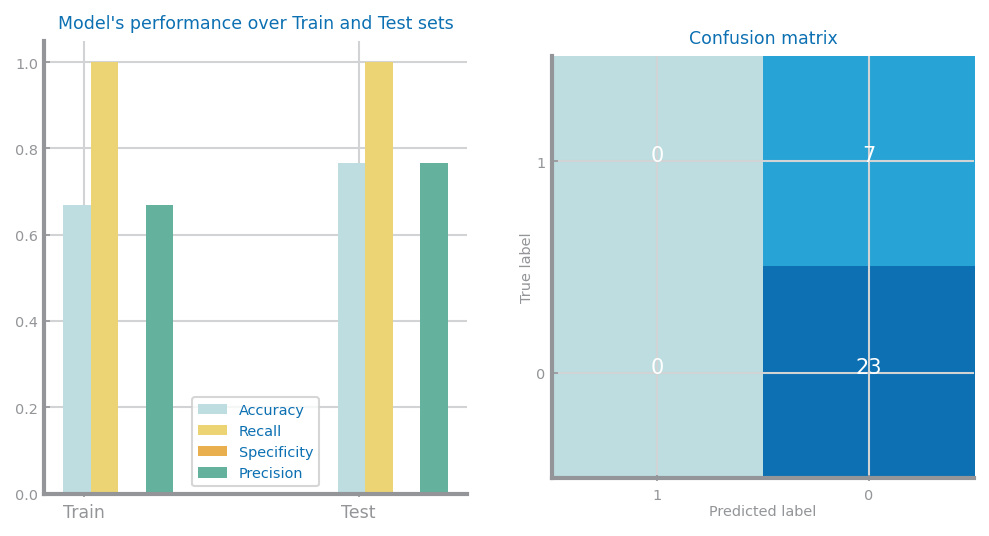

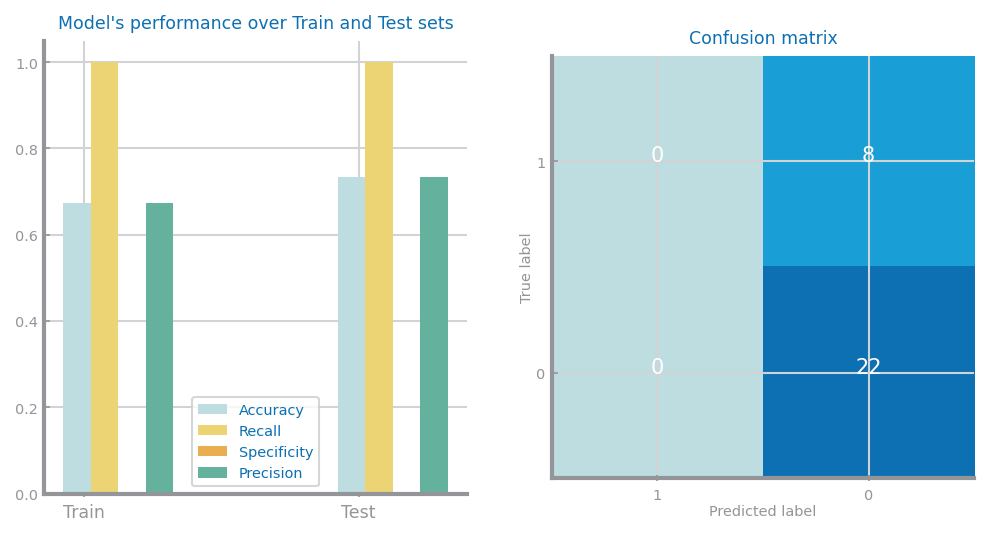

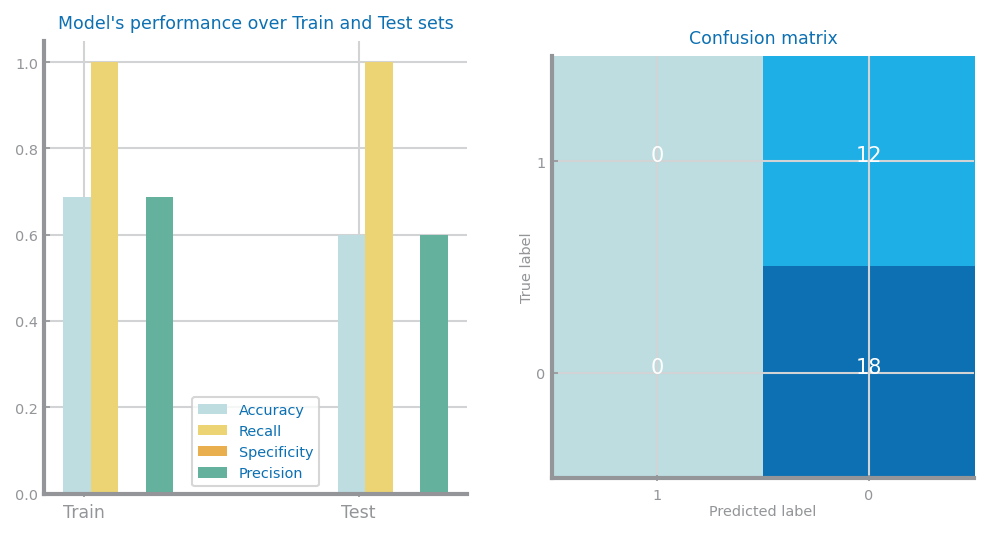

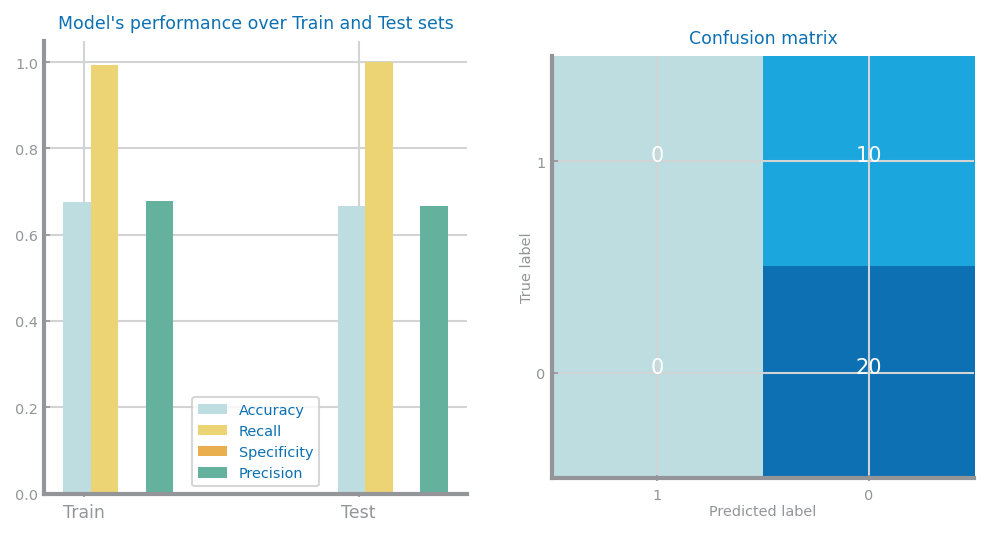

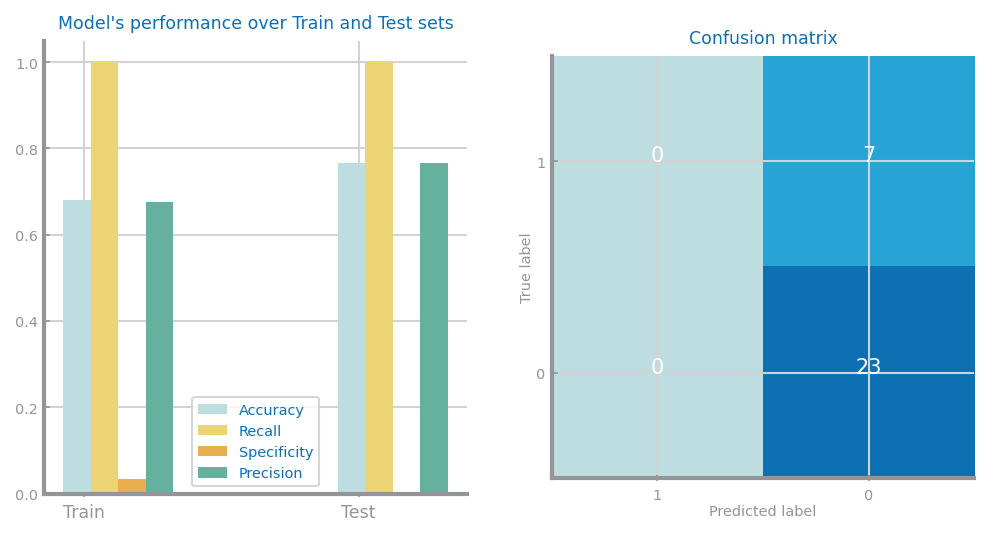

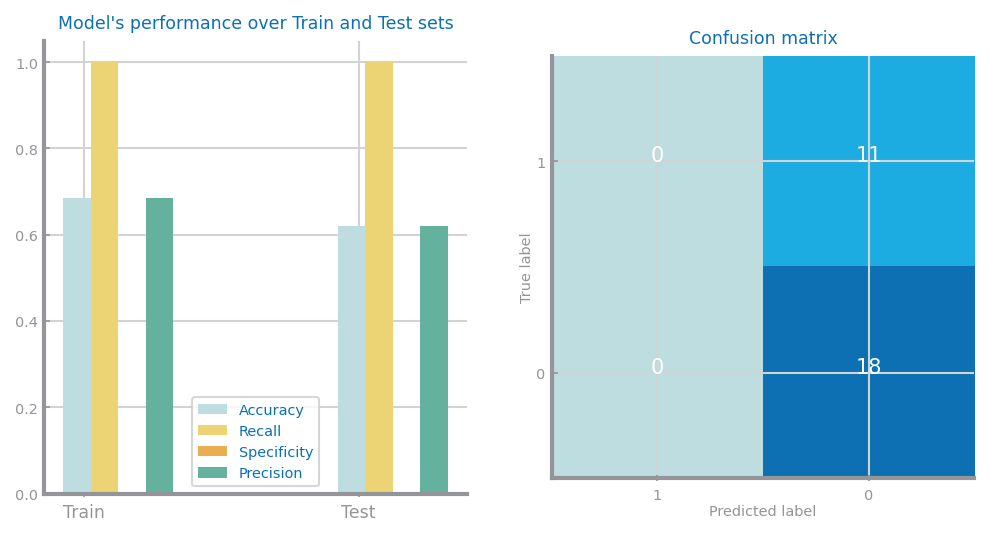

In [41]:

print("For the {} distance best was {} k with an acc of {:.2f}% ".format('manhattan', dists['manhattan'][0], dists['manhattan'][2]*100))
print("Lets see how it did for each fold\n")
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]

    knn = KNeighborsClassifier(n_neighbors=v[0], metric=k)
    knn.fit(trnX, trnY)
    prd_trn = knn.predict(trnX)
    prd_tst = knn.predict(tstX)

    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
    
    

For the euclidean distance best was 23 k with an acc of 67.86% 
Lets see how it did for each fold



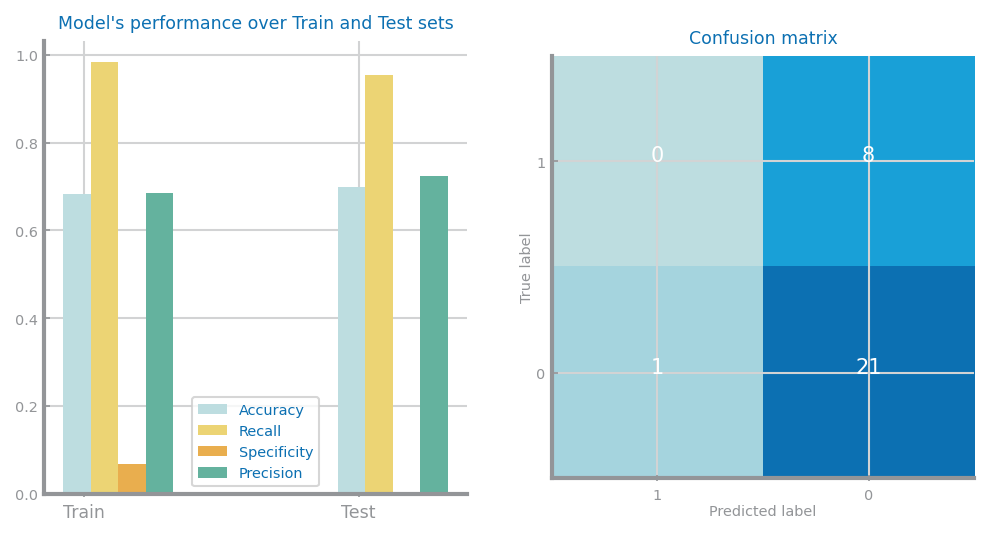

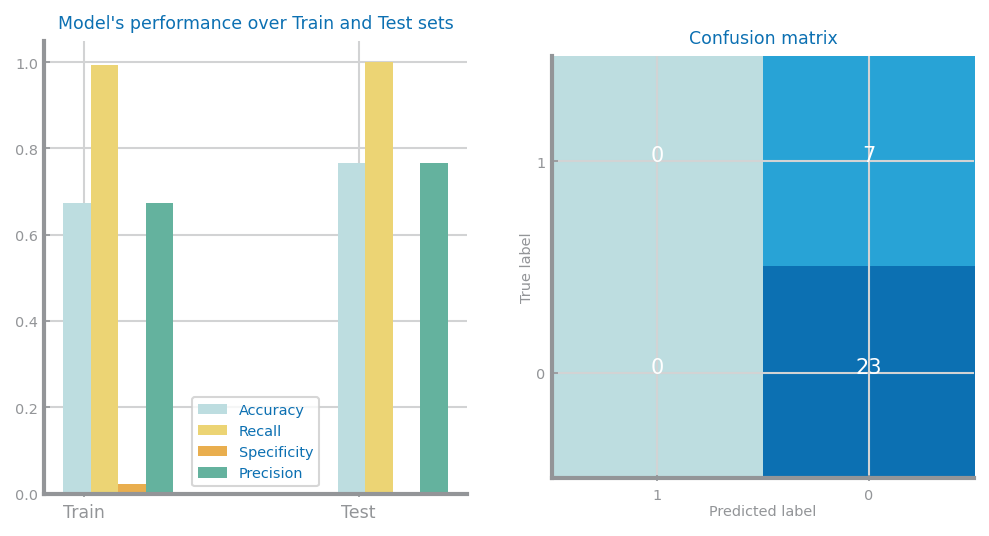

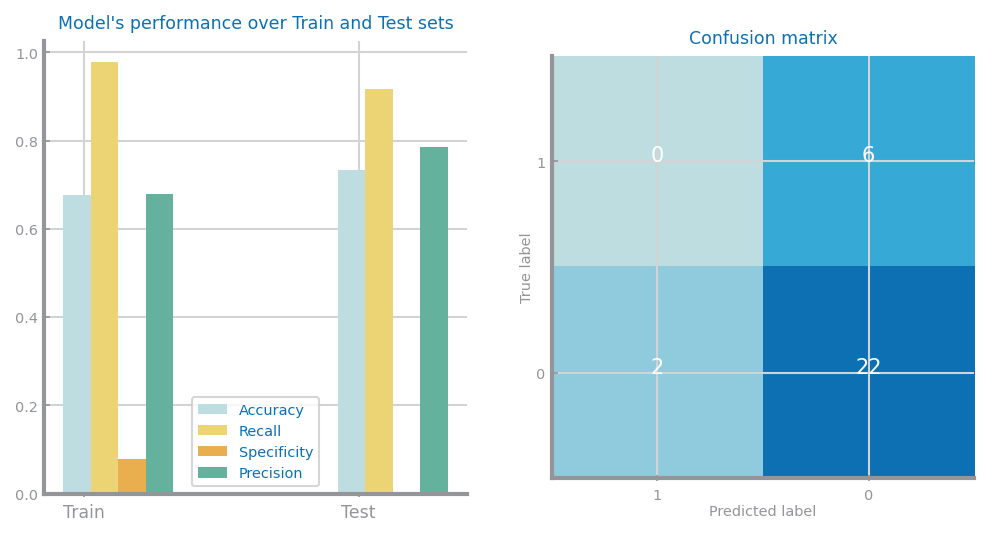

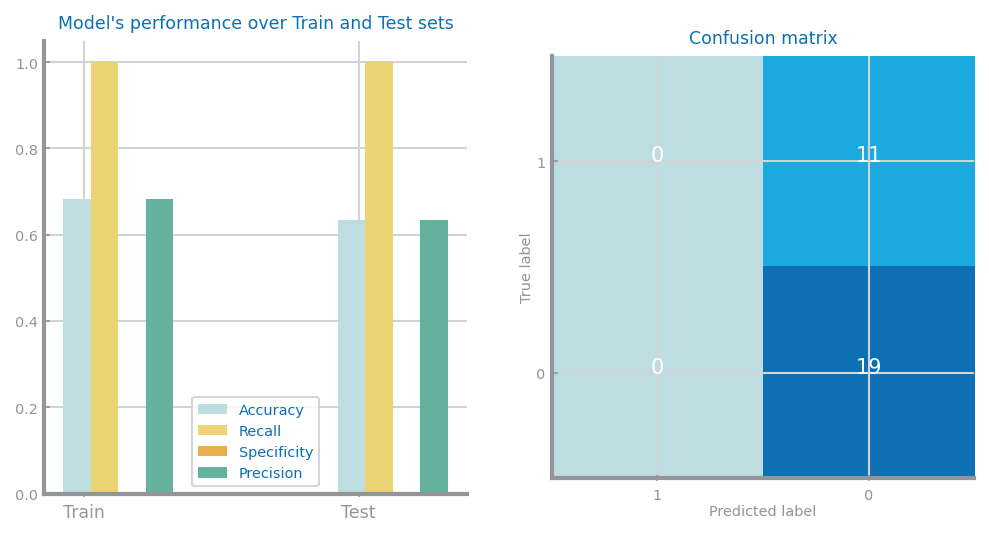

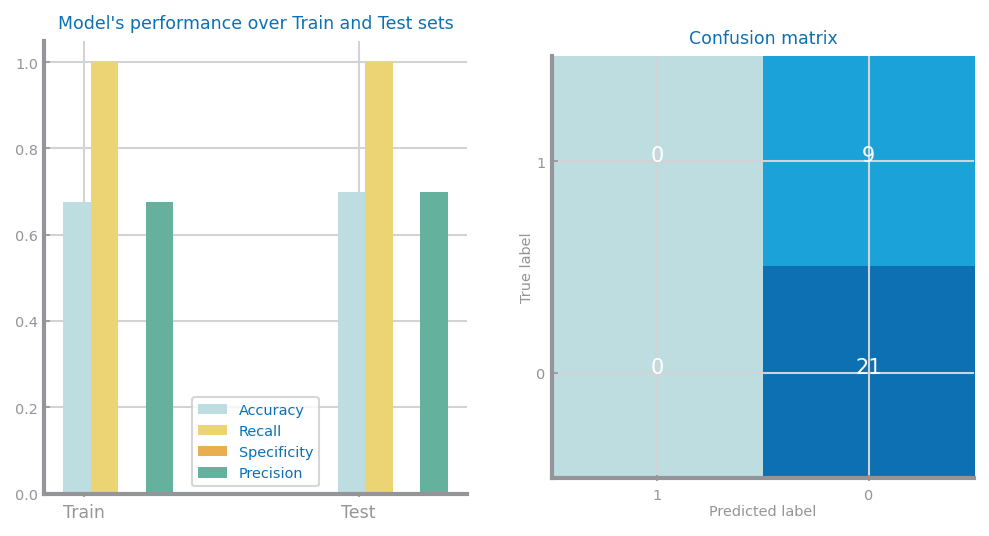

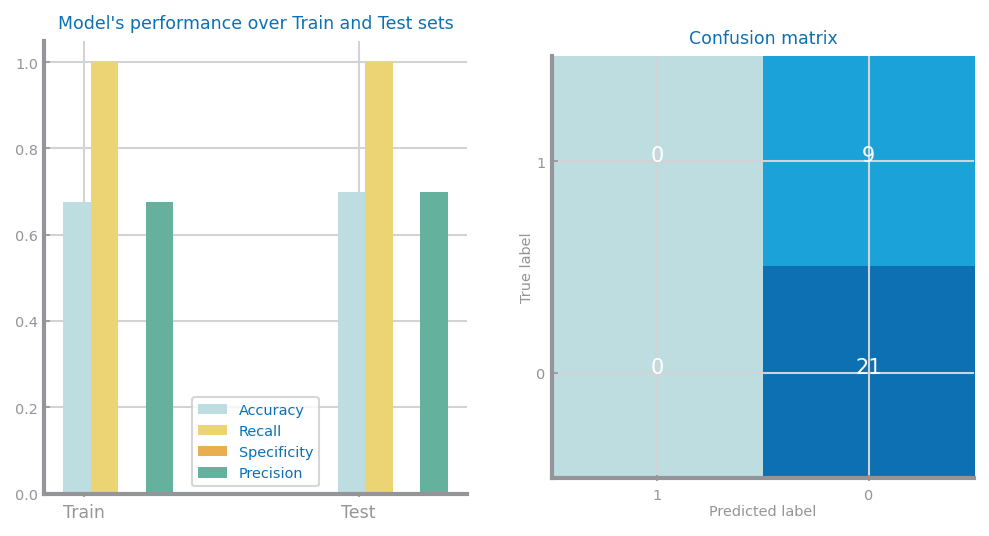

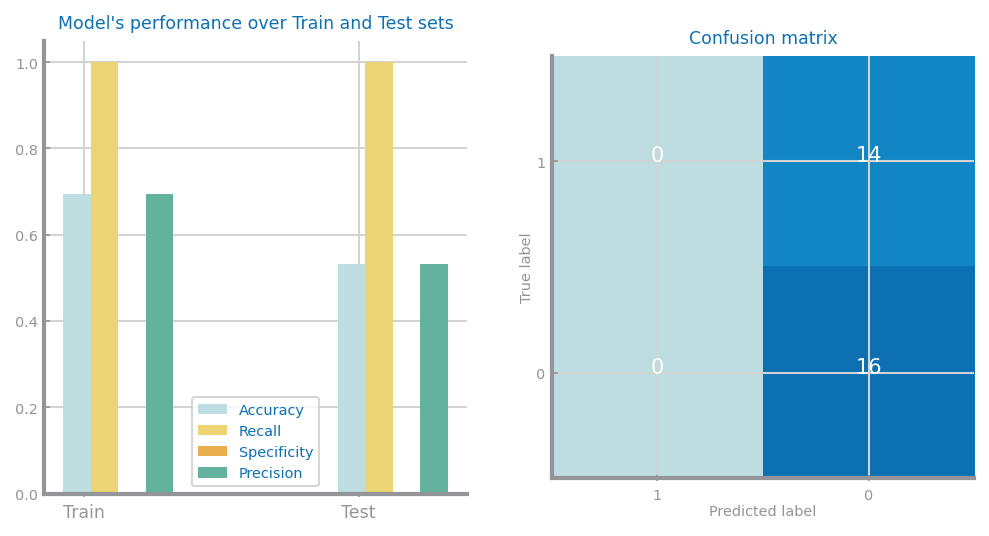

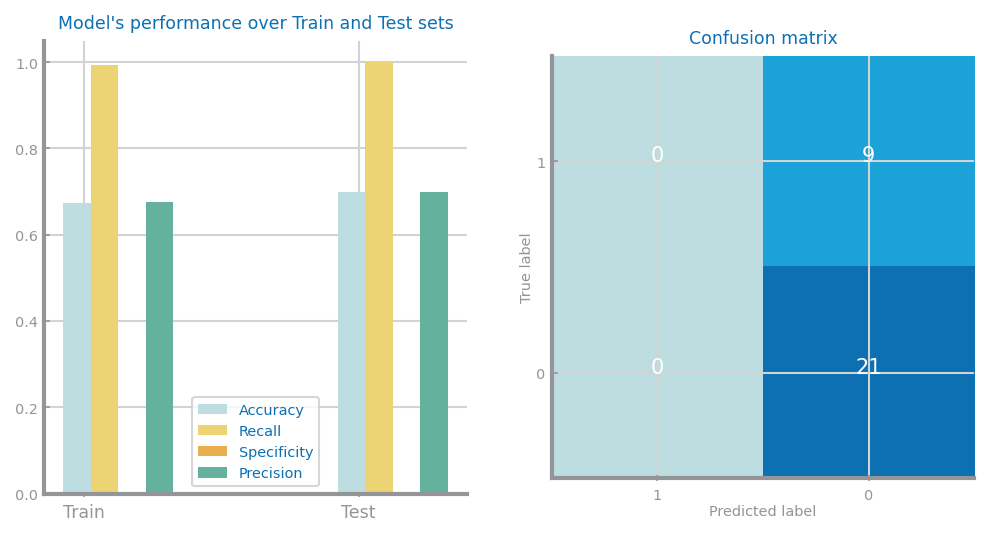

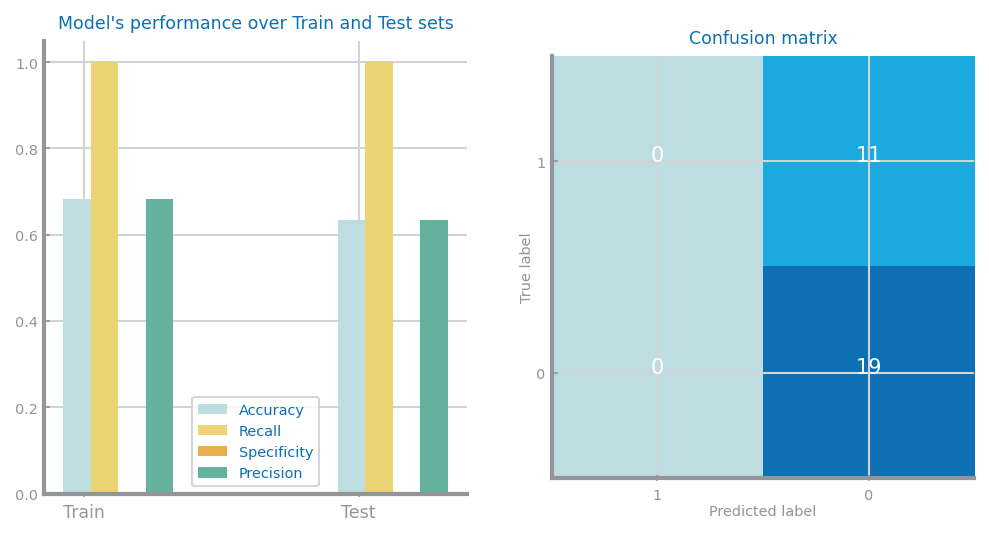

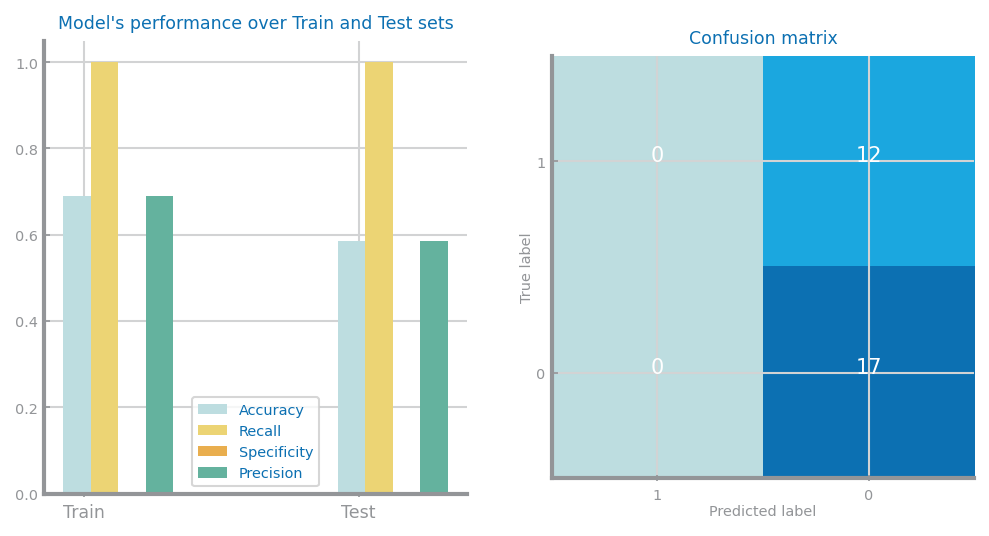

In [42]:

print("For the {} distance best was {} k with an acc of {:.2f}% ".format('euclidean', dists['euclidean'][0], dists['euclidean'][2]*100))
print("Lets see how it did for each fold\n")
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]

    knn = KNeighborsClassifier(n_neighbors=v[0], metric=k)
    knn.fit(trnX, trnY)
    prd_trn = knn.predict(trnX)
    prd_tst = knn.predict(tstX)

    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
   

For the chebyshev distance best was 25 k with an acc of 67.89% 
Lets see how it did for each fold



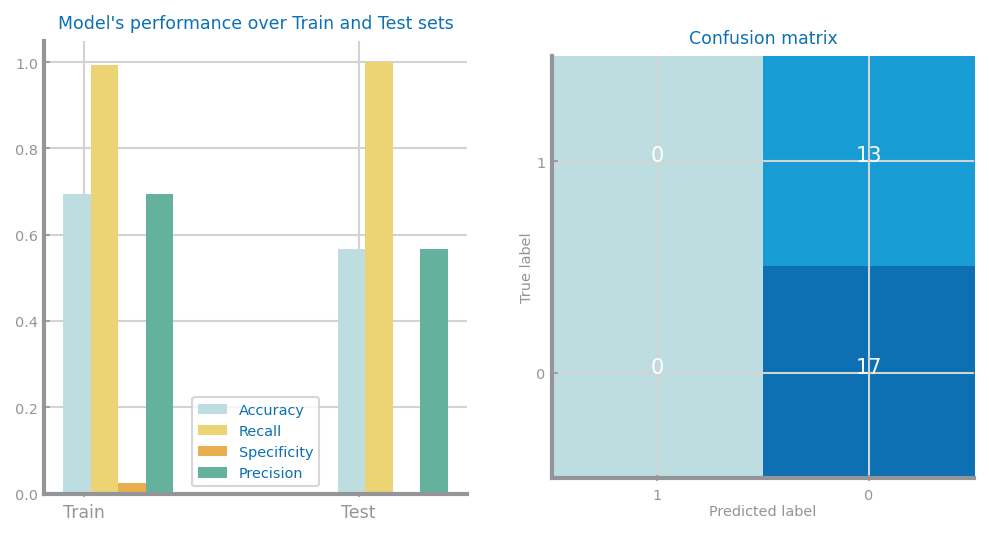

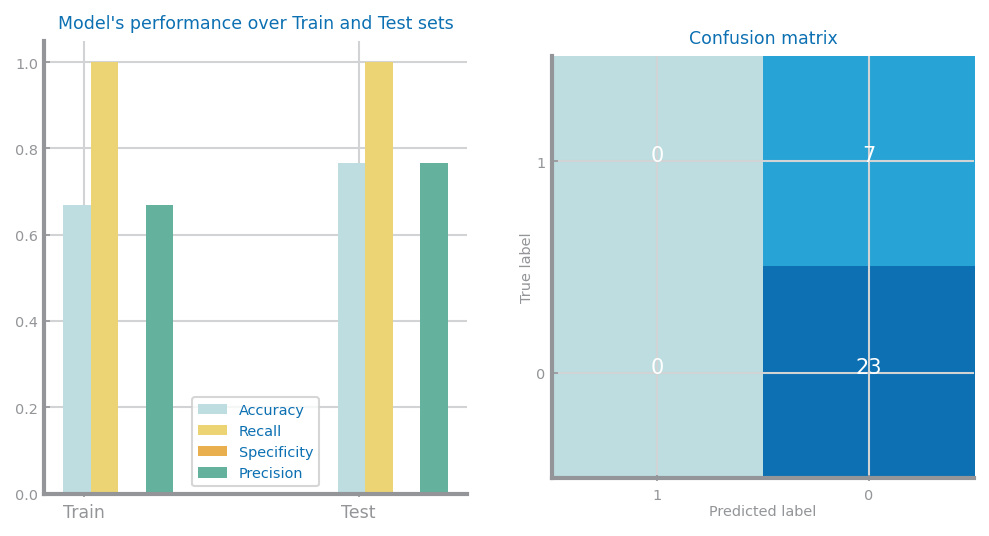

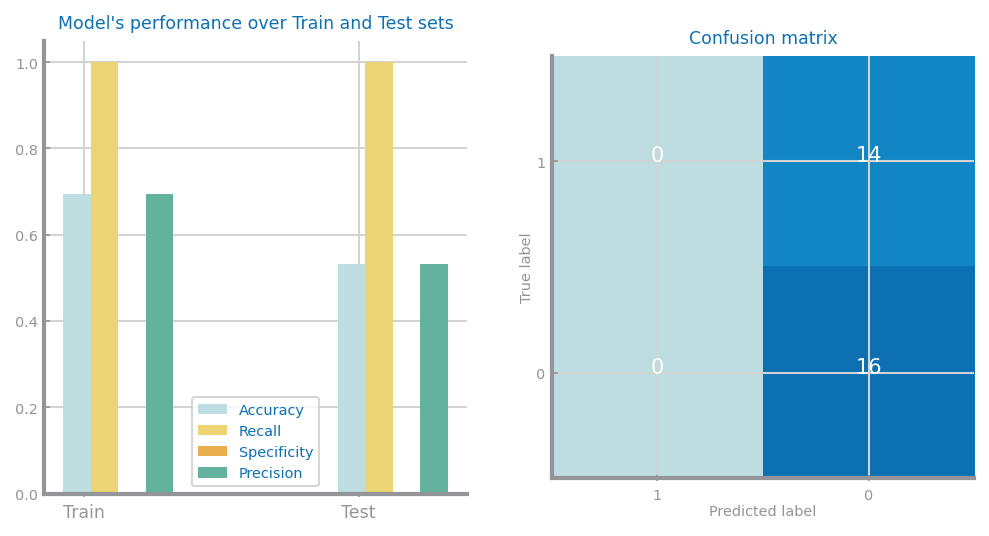

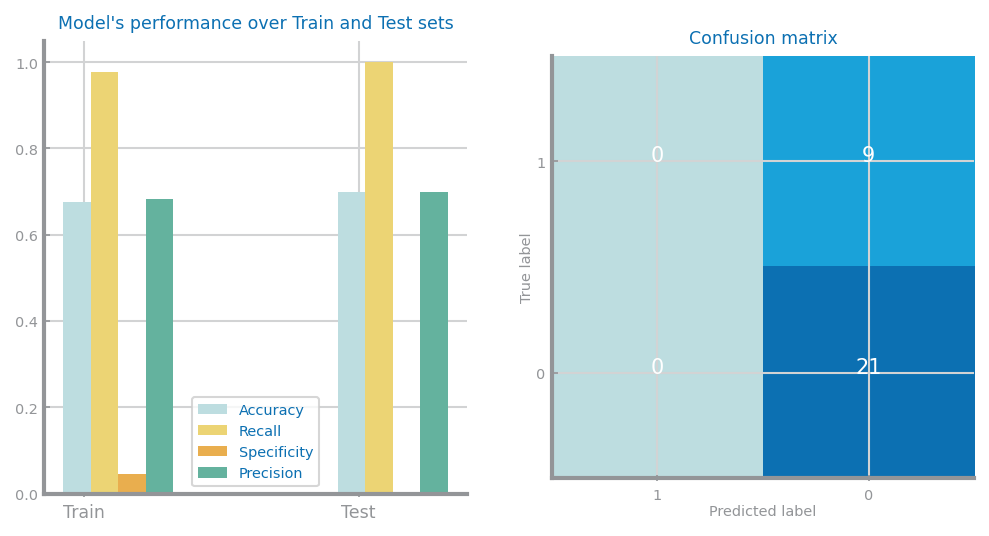

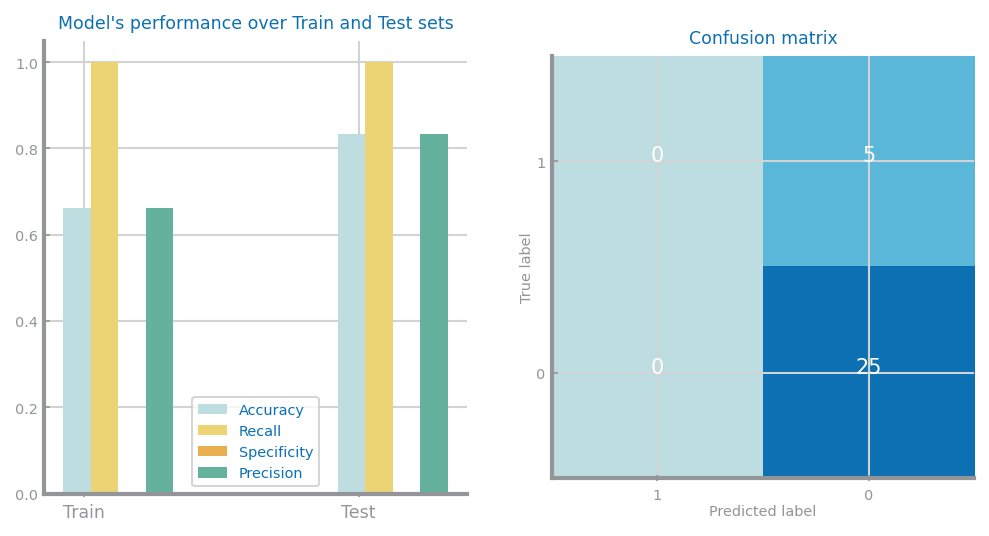

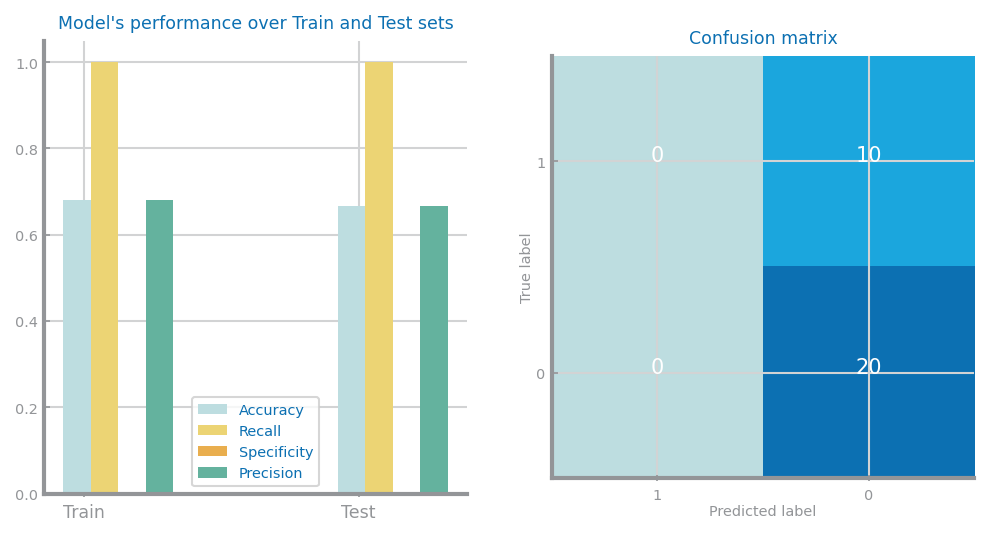

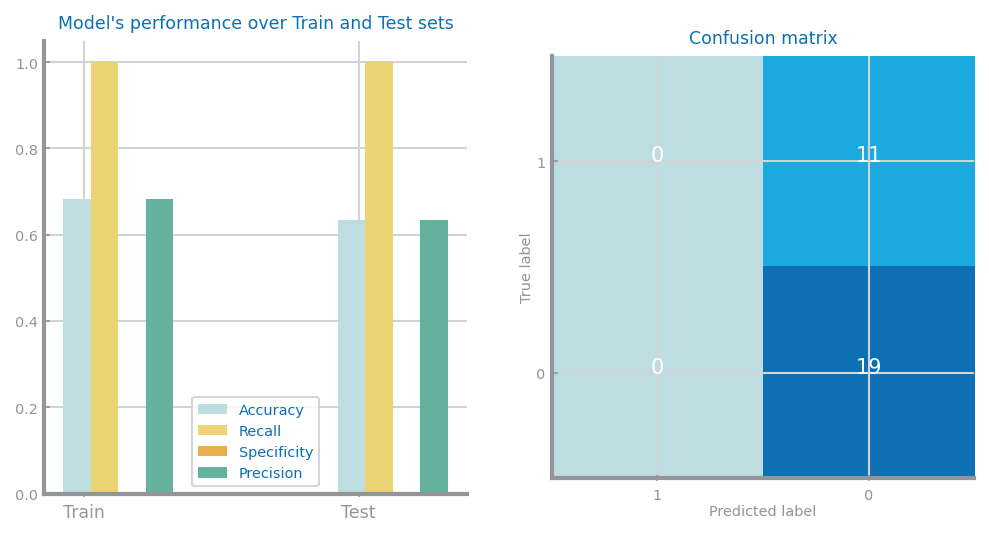

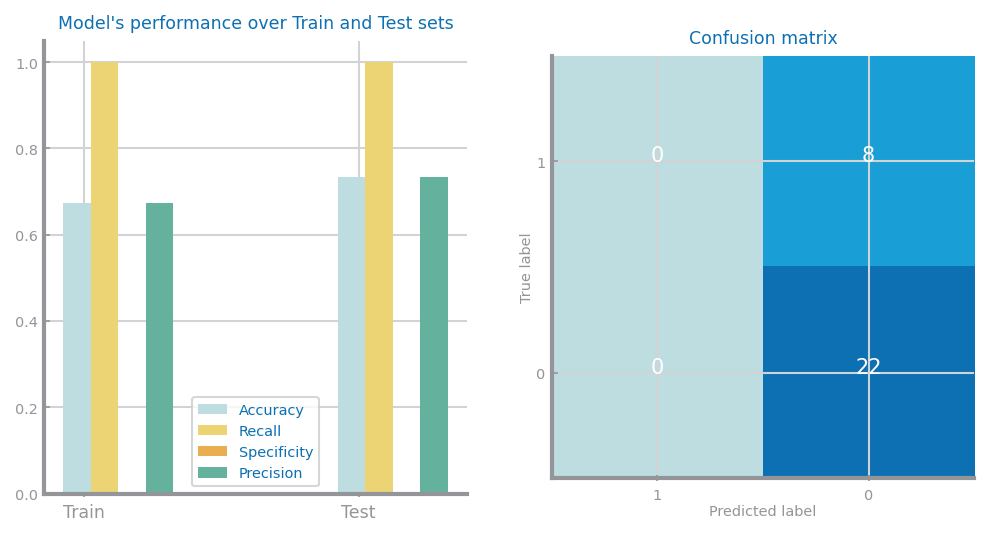

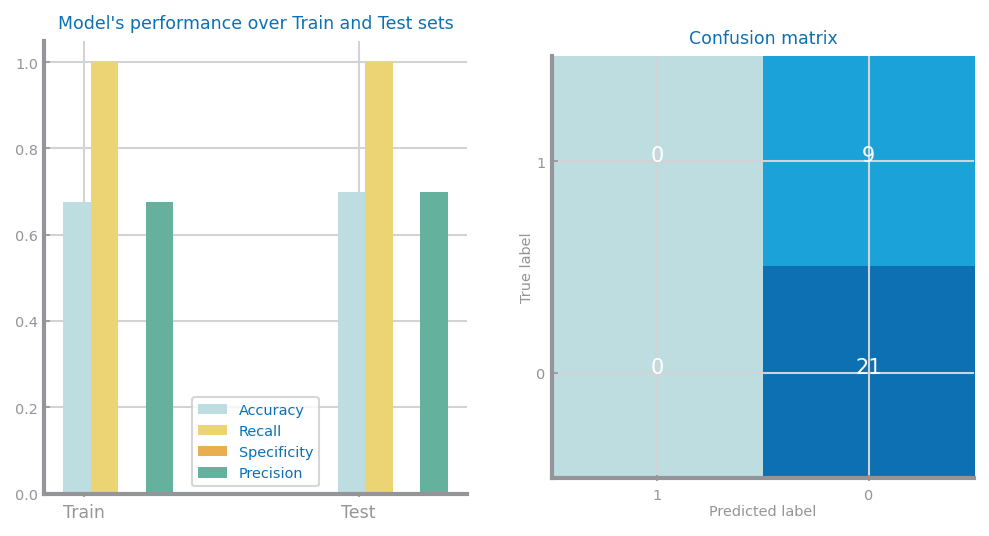

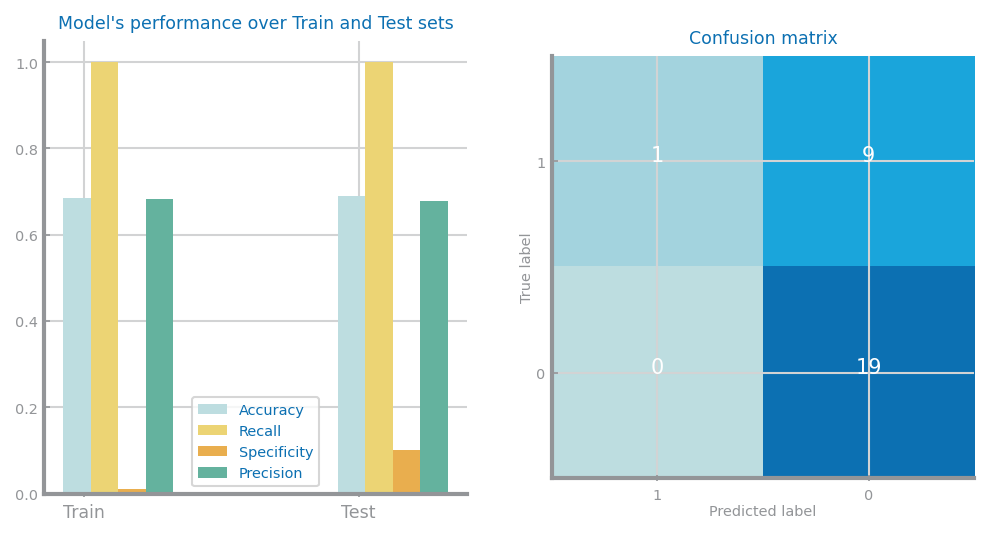

In [43]:

print("For the {} distance best was {} k with an acc of {:.2f}% ".format('chebyshev', dists['chebyshev'][0], dists['chebyshev'][2]*100))
print("Lets see how it did for each fold\n")
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]

    knn = KNeighborsClassifier(n_neighbors=v[0], metric=k)
    knn.fit(trnX, trnY)
    prd_trn = knn.predict(trnX)
    prd_tst = knn.predict(tstX)

    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
   

### Heart failure dataset (Standardized)
We will now test the Heart failure dataset standardized values

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../../datasets/hf_scaled/HF_standardized.csv')

In [45]:
y: np.ndarray = data.pop('DEATH_EVENT').values # Target Variable
X: np.ndarray = data.values # Values of each feature on each record
labels = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = ['manhattan', 'euclidean', 'chebyshev']

{'manhattan': [7, KNeighborsClassifier(metric='manhattan', n_neighbors=7), 0.7725287356321839], 'euclidean': [5, KNeighborsClassifier(metric='euclidean'), 0.7859770114942529], 'chebyshev': [19, KNeighborsClassifier(metric='chebyshev', n_neighbors=19), 0.7860919540229885]}


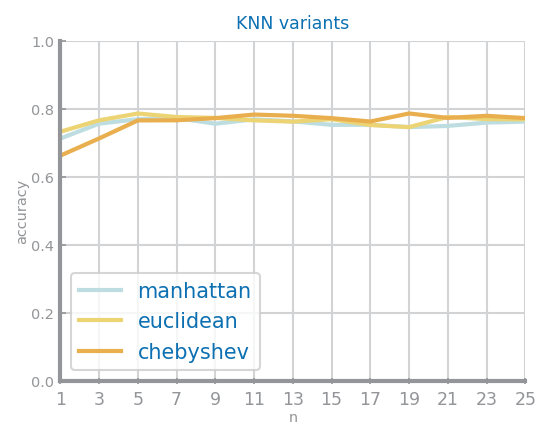

Best results with 19 neighbors and chebyshev


In [46]:
values = {}
best = (0, '')
best_model = None
last_best = 0
dists = {'manhattan': None, 'euclidean':None, 'chebyshev':None}
for d in dist:
    b_f_d=["","",0]
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        scores = cross_val_score(knn, X, y, cv=kf)
        yvalues.append(scores.mean())
        if scores.mean() > last_best:
            best = (n, d)
            last_best = scores.mean()
            best_model
        if scores.mean() > b_f_d[2]:
            b_f_d = [n,knn,yvalues[-1]]
    dists[d] = b_f_d
    values[d] = yvalues

print(dists)
plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

For the manhattan distance best was 7 k with an acc of 77.25% 
Lets see how it did for each fold



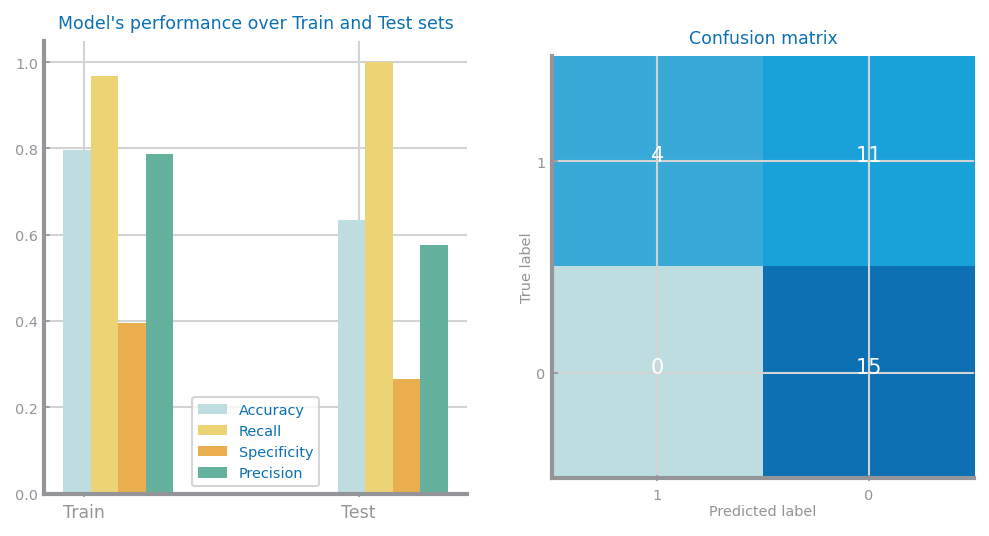

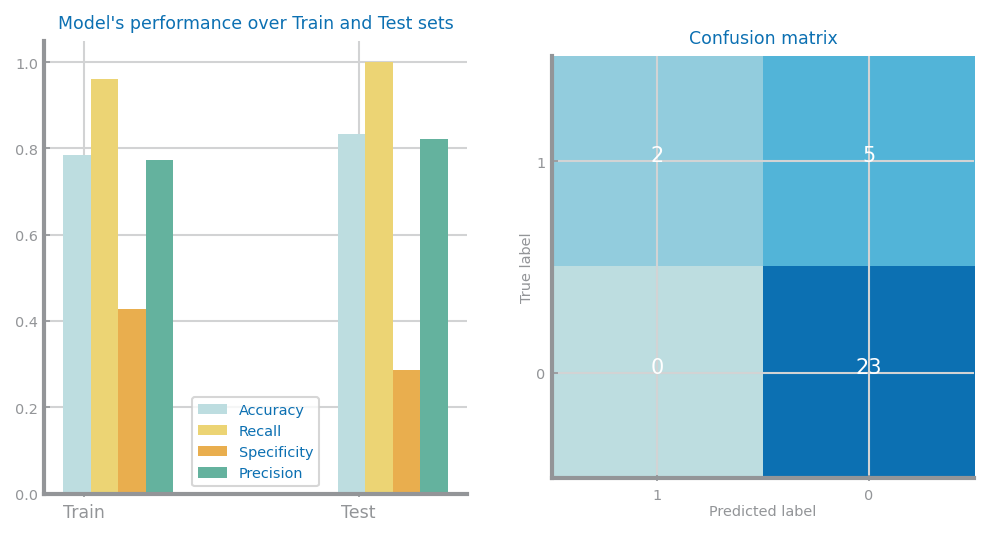

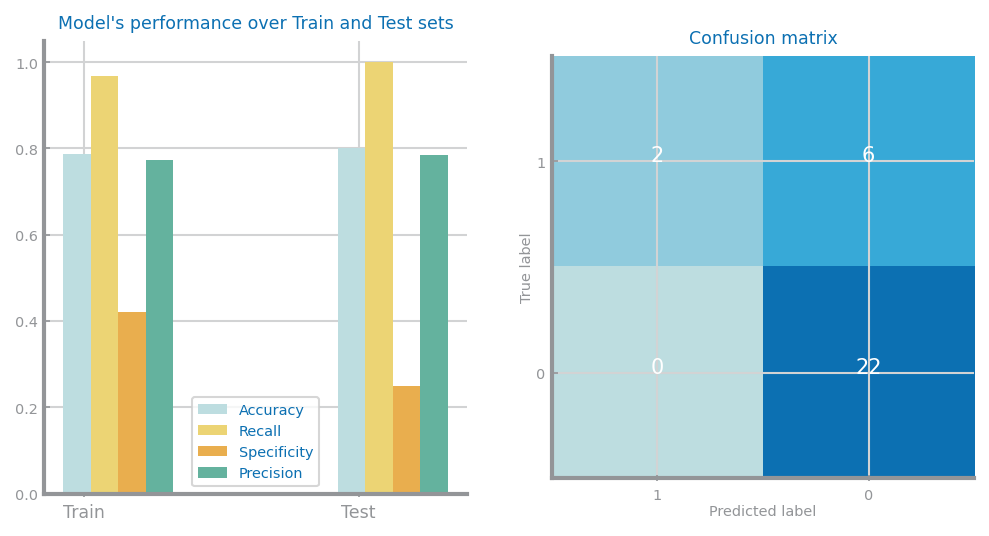

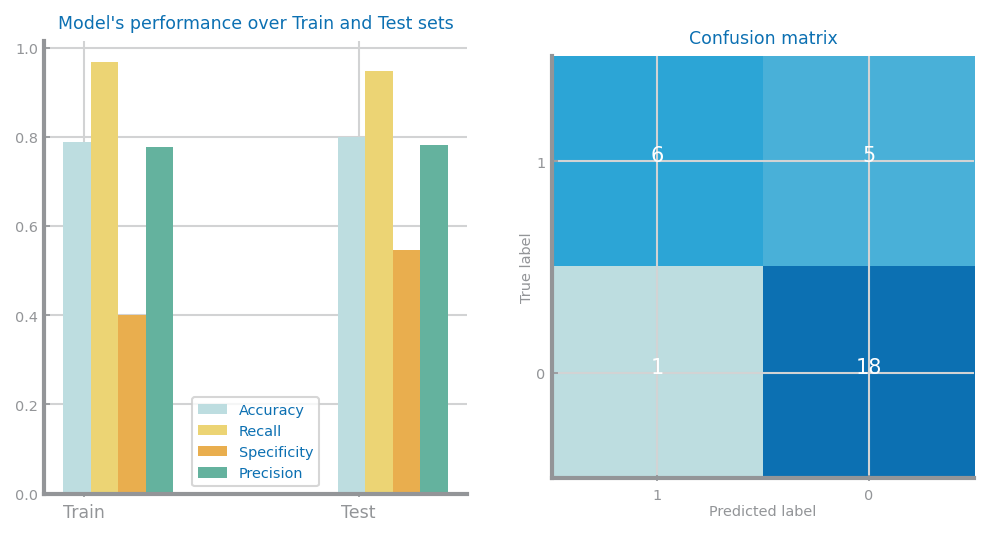

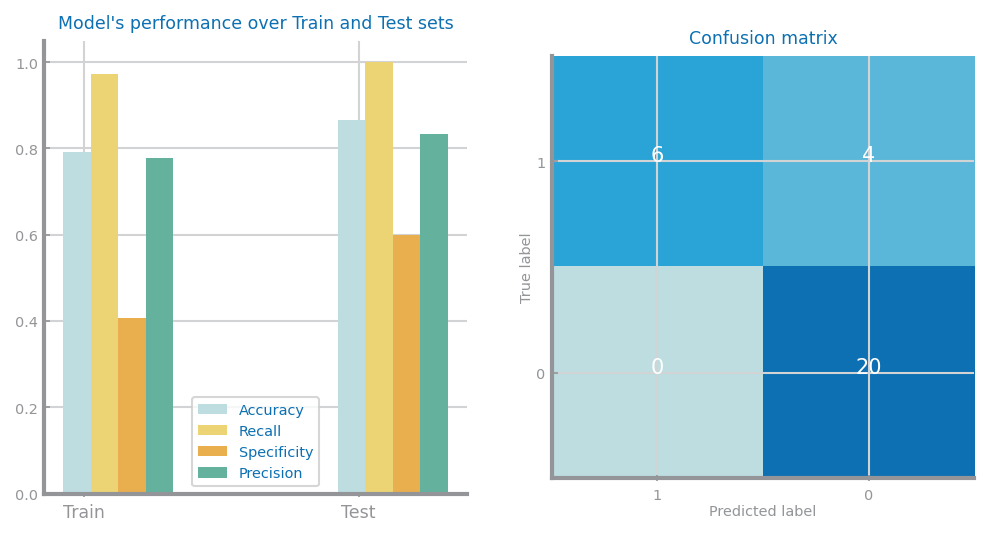

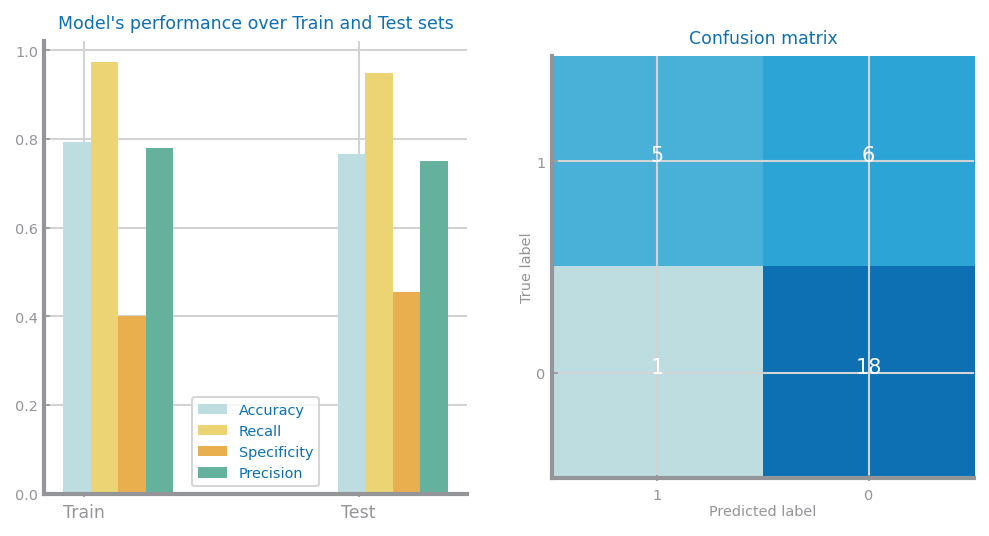

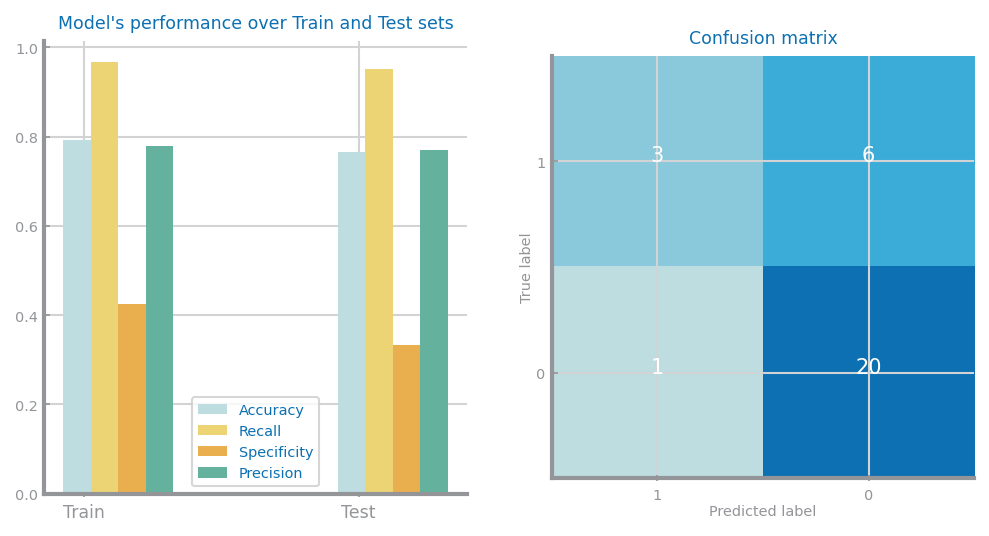

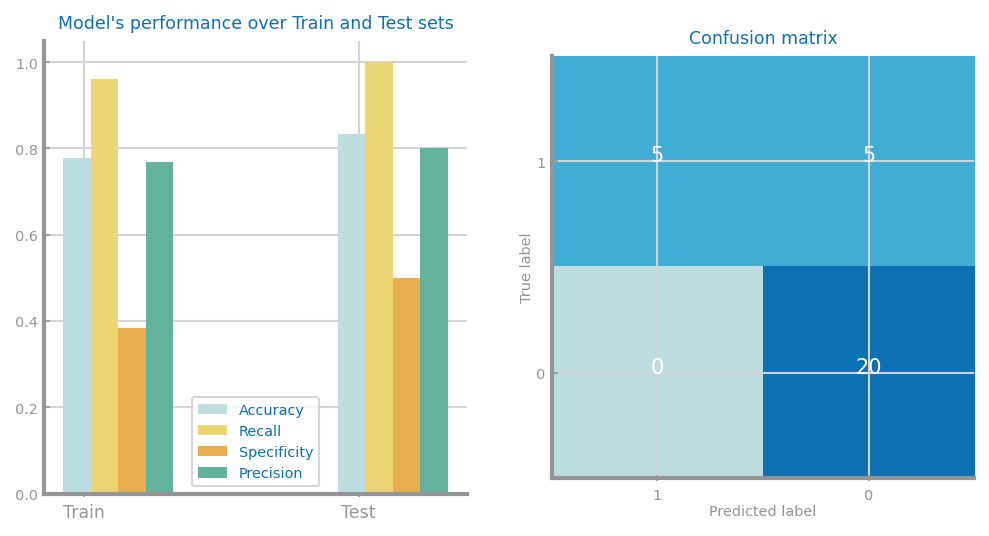

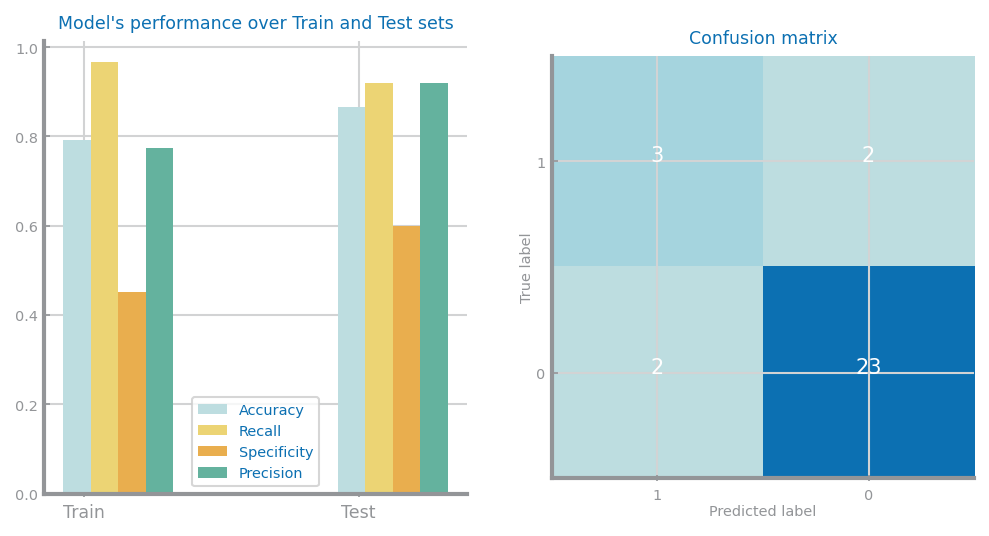

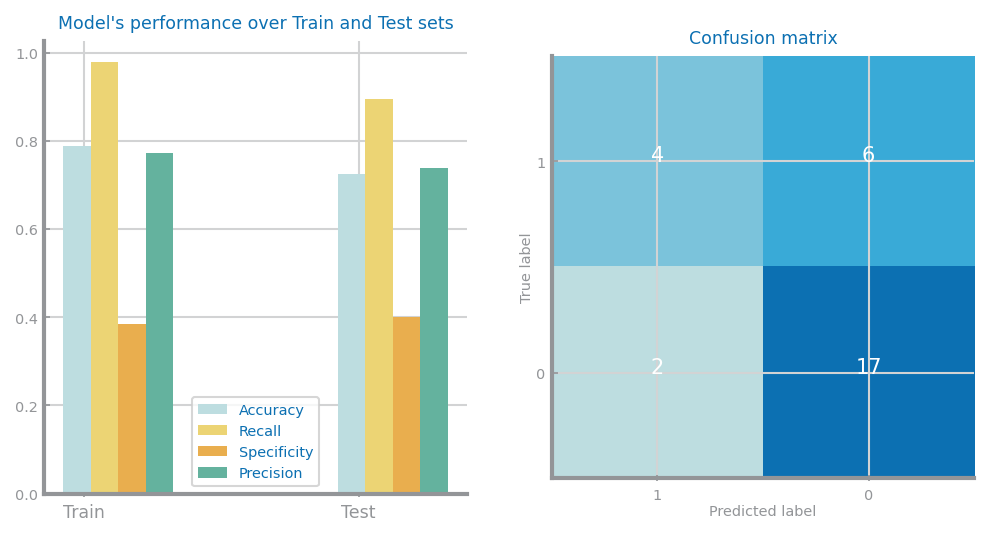

In [47]:

print("For the {} distance best was {} k with an acc of {:.2f}% ".format('manhattan', dists['manhattan'][0], dists['manhattan'][2]*100))
print("Lets see how it did for each fold\n")
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]

    knn = KNeighborsClassifier(n_neighbors=v[0], metric=k)
    knn.fit(trnX, trnY)
    prd_trn = knn.predict(trnX)
    prd_tst = knn.predict(tstX)

    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
    
    

For the euclidean distance best was 5 k with an acc of 78.60% 
Lets see how it did for each fold



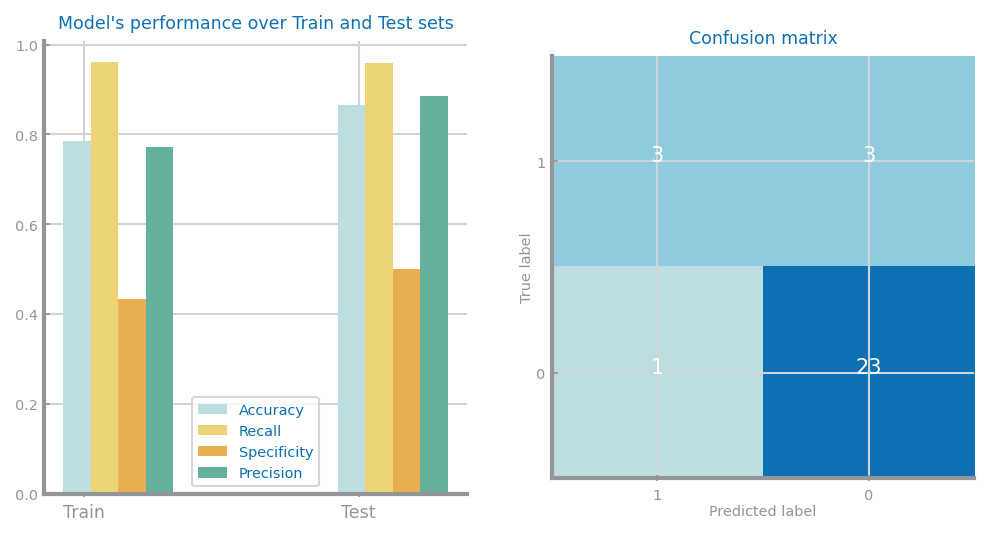

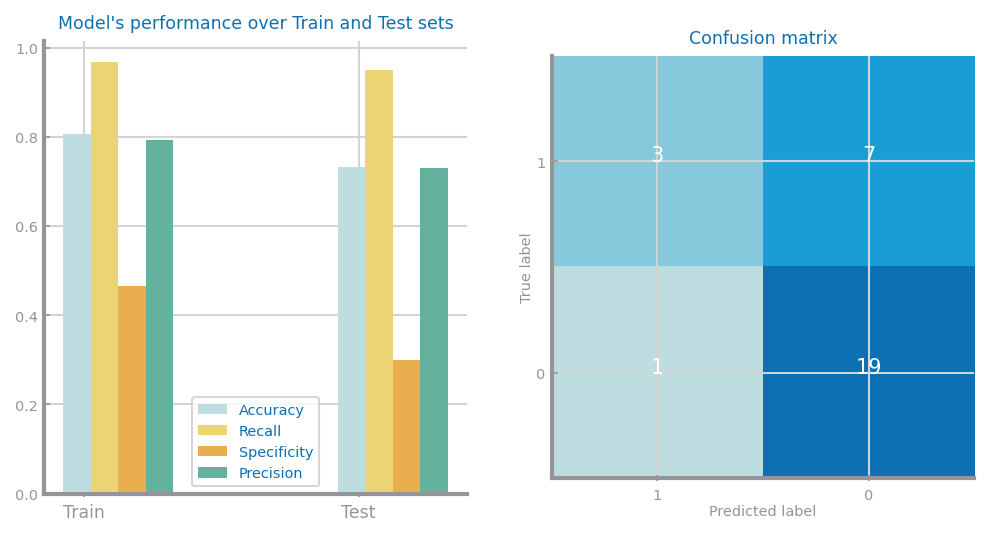

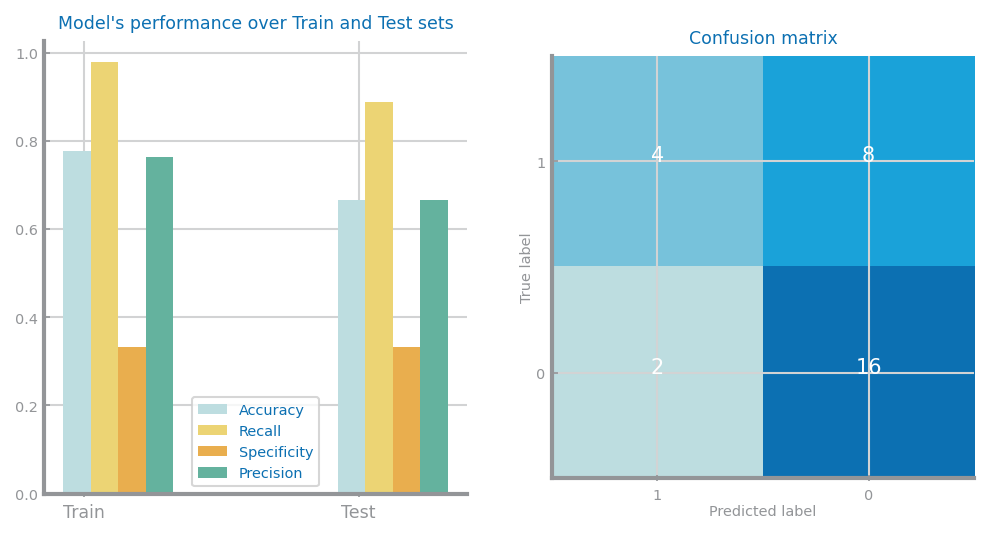

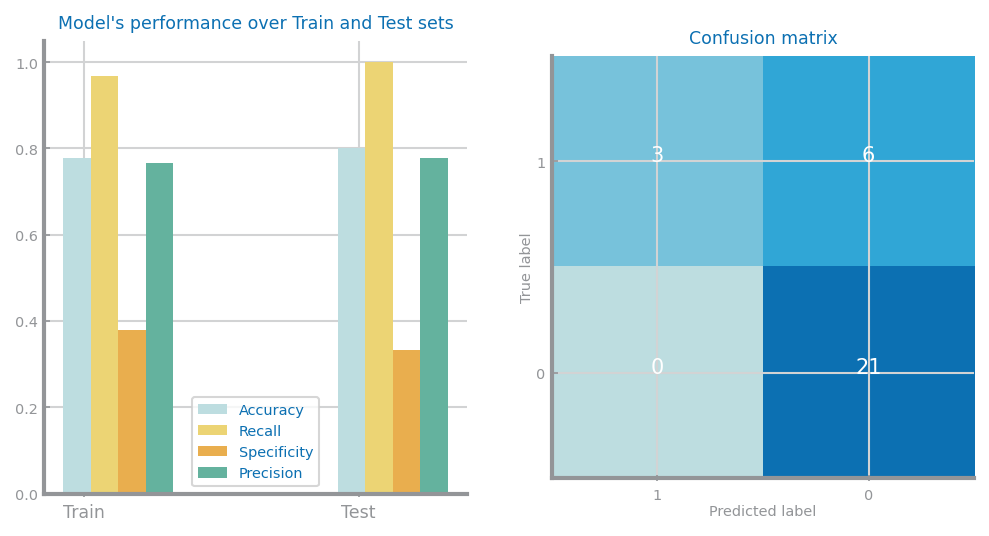

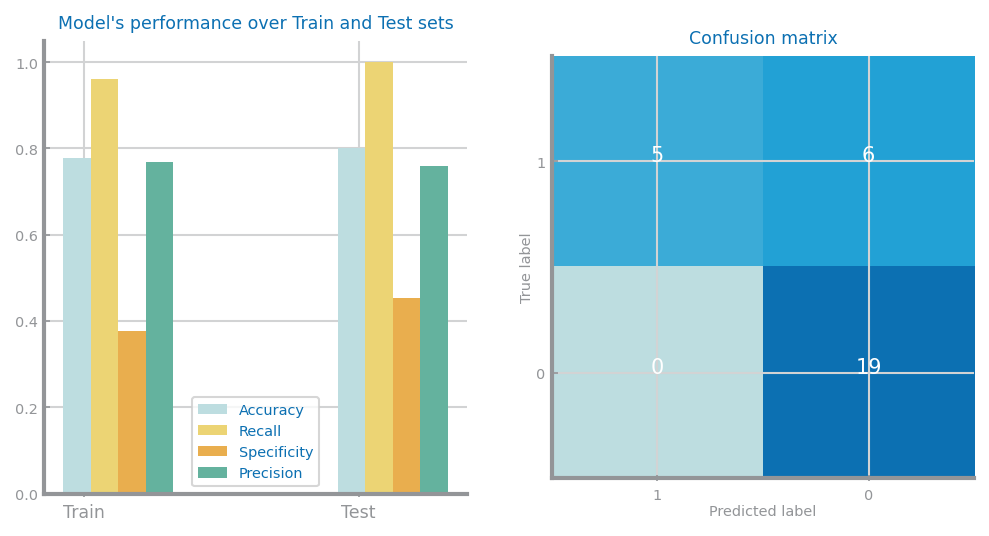

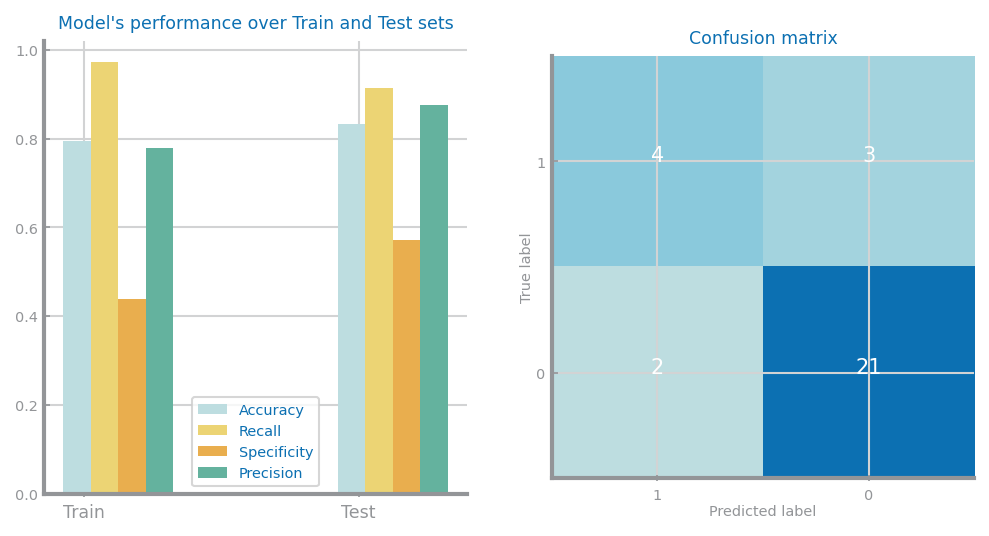

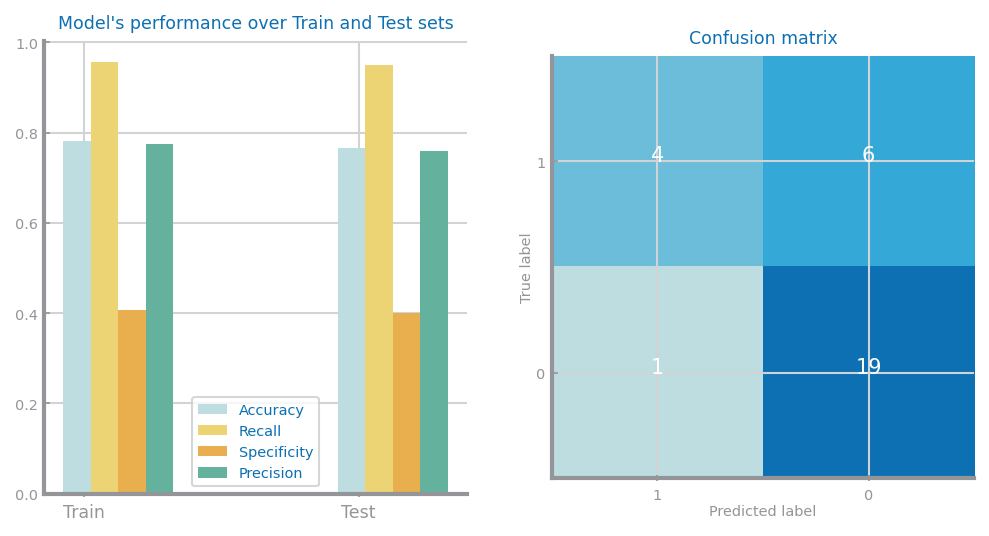

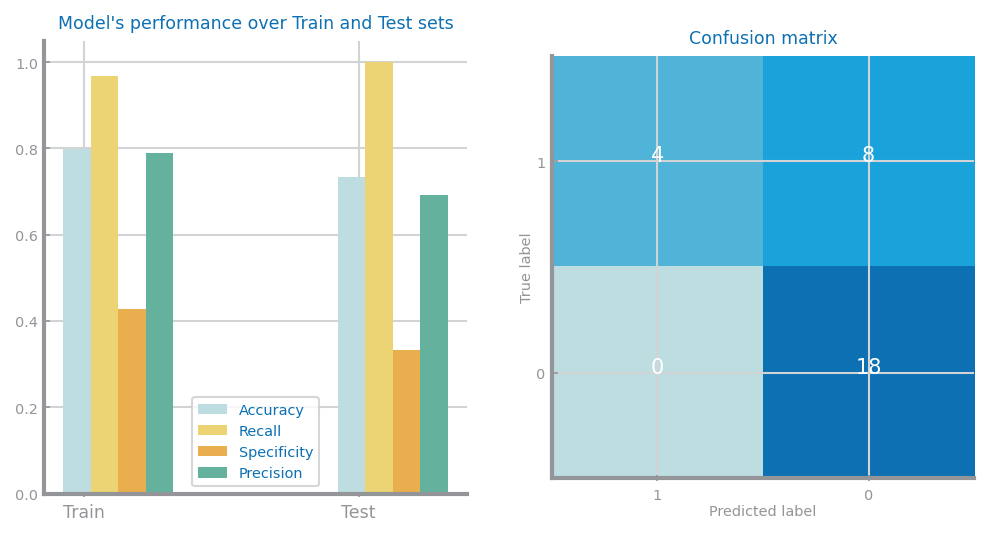

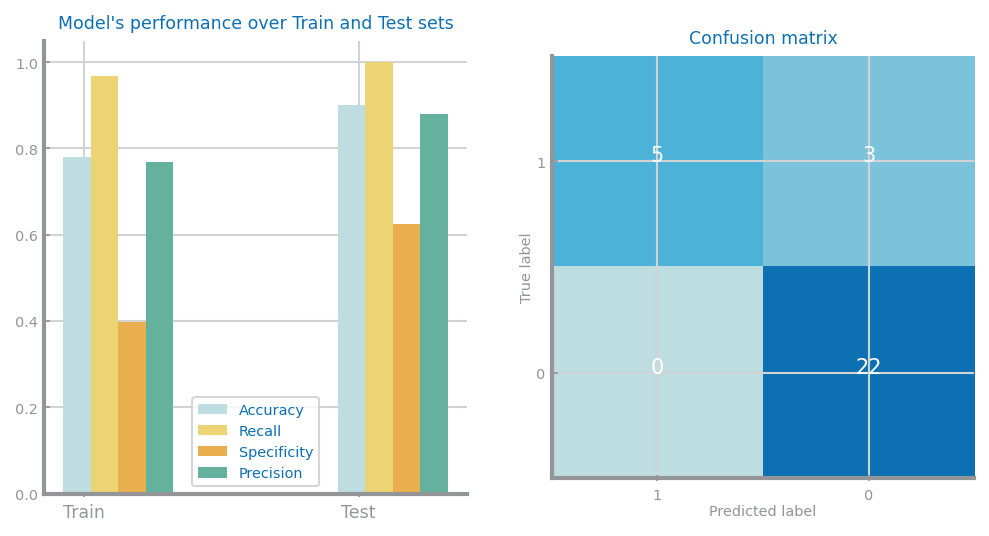

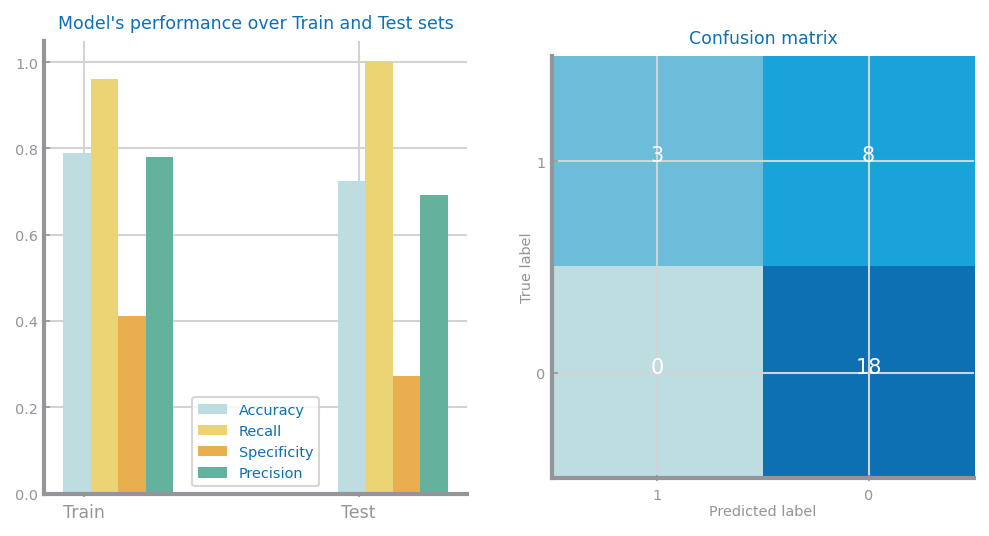

In [48]:

print("For the {} distance best was {} k with an acc of {:.2f}% ".format('euclidean', dists['euclidean'][0], dists['euclidean'][2]*100))
print("Lets see how it did for each fold\n")
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]

    knn = KNeighborsClassifier(n_neighbors=v[0], metric=k)
    knn.fit(trnX, trnY)
    prd_trn = knn.predict(trnX)
    prd_tst = knn.predict(tstX)

    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
   

For the chebyshev distance best was 19 k with an acc of 78.61% 
Lets see how it did for each fold



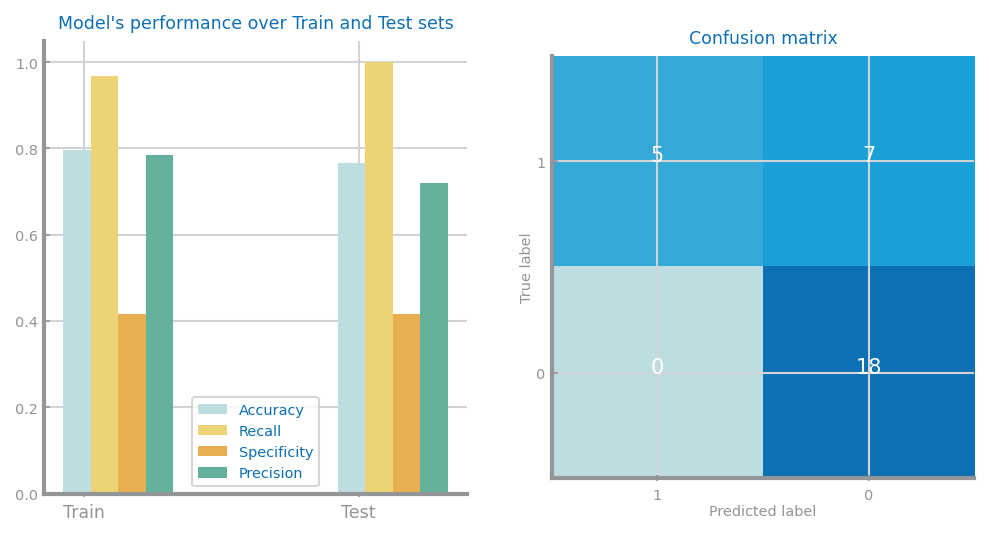

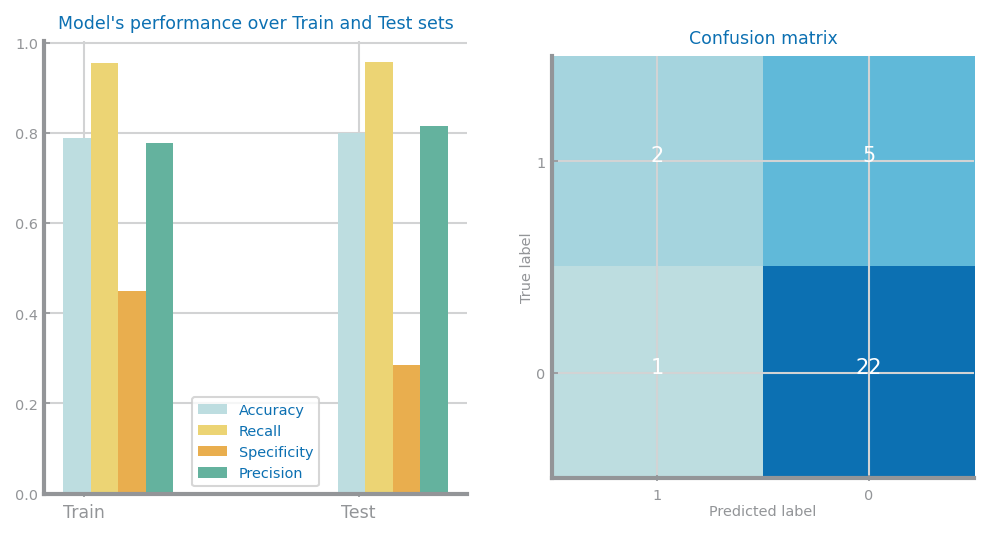

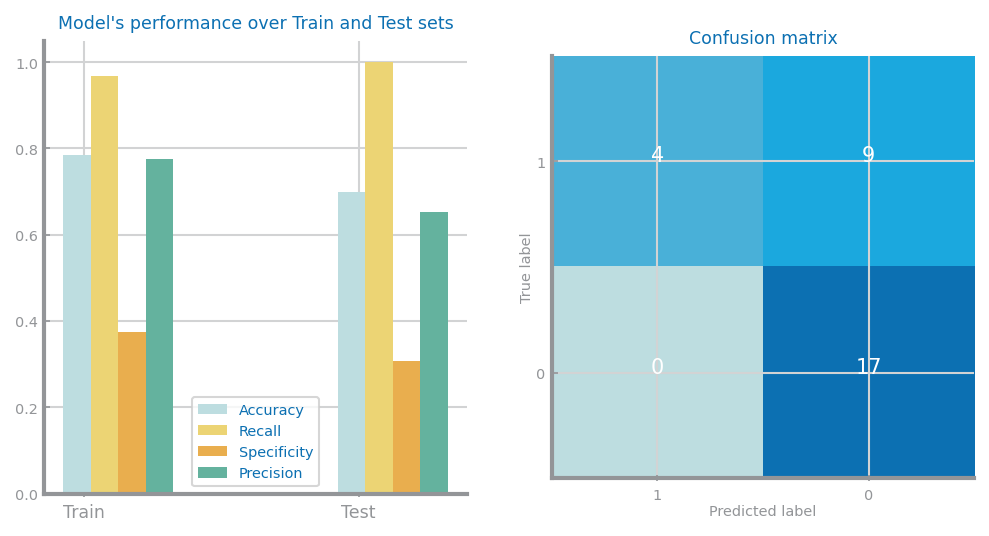

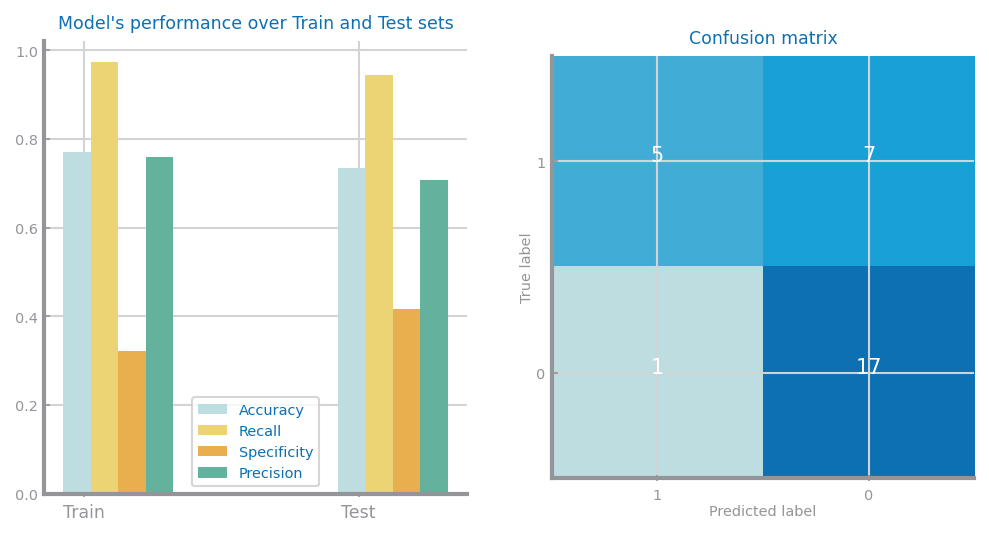

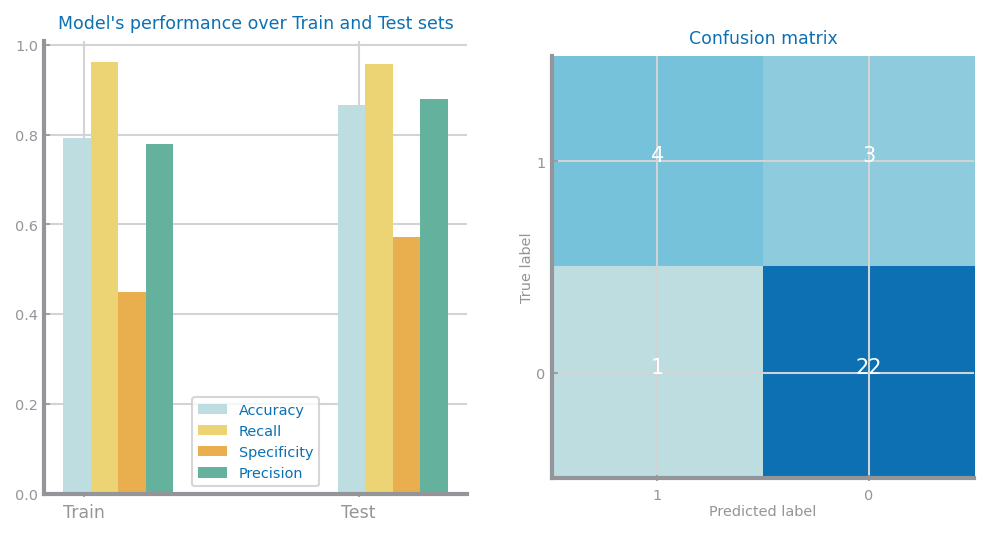

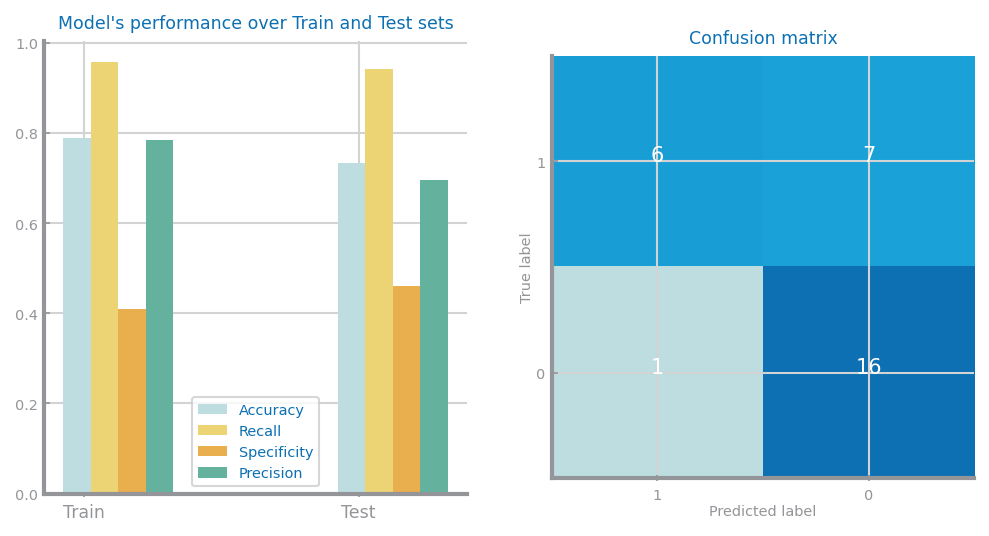

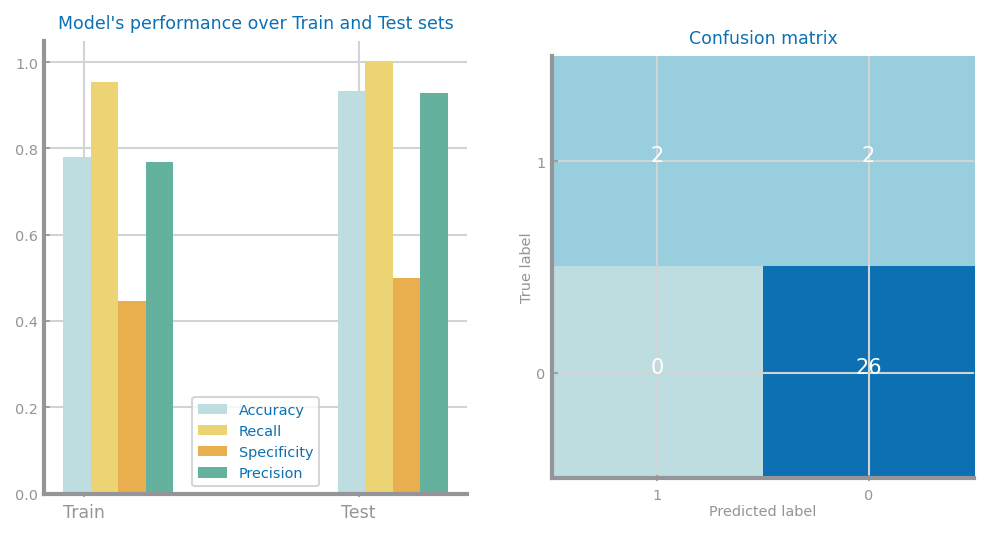

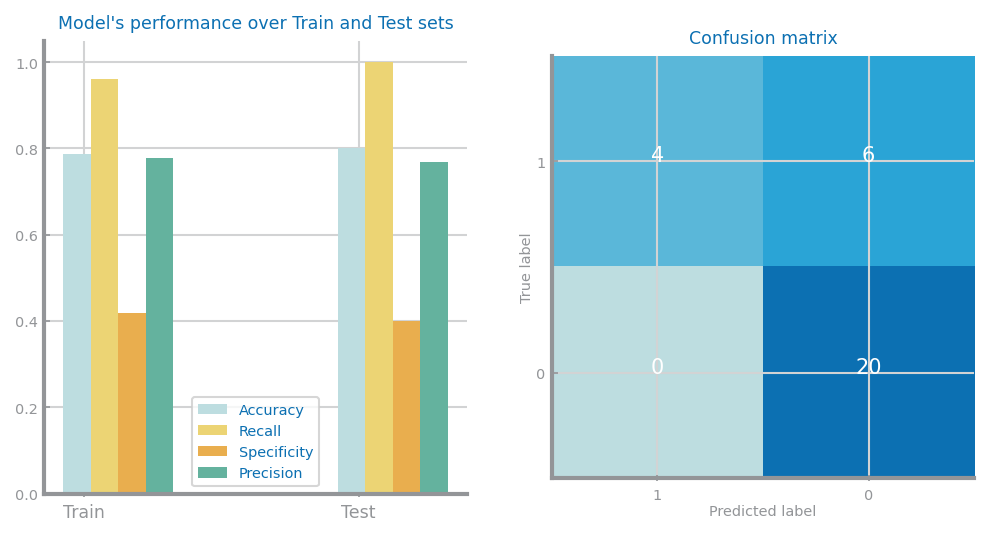

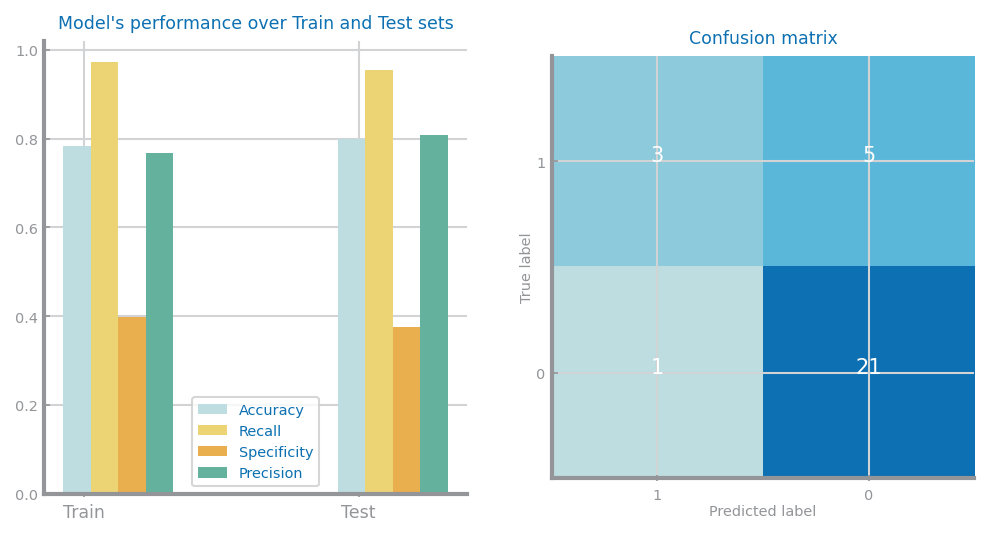

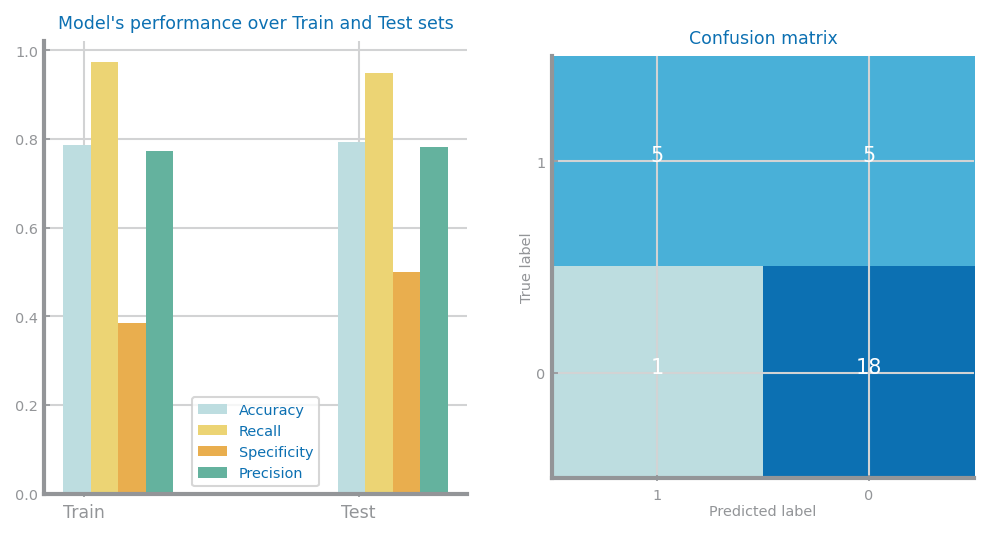

In [49]:

print("For the {} distance best was {} k with an acc of {:.2f}% ".format('chebyshev', dists['chebyshev'][0], dists['chebyshev'][2]*100))
print("Lets see how it did for each fold\n")
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]

    knn = KNeighborsClassifier(n_neighbors=v[0], metric=k)
    knn.fit(trnX, trnY)
    prd_trn = knn.predict(trnX)
    prd_tst = knn.predict(tstX)

    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
   

### Heart failure dataset (Normalized)
We will now test the Heart failure dataset normalized values

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../../datasets/hf_scaled/HF_normalized.csv')

In [52]:
y: np.ndarray = data.pop('DEATH_EVENT').values # Target Variable
X: np.ndarray = data.values # Values of each feature on each record
labels = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = ['manhattan', 'euclidean', 'chebyshev']

{'manhattan': [17, KNeighborsClassifier(metric='manhattan', n_neighbors=17), 0.745632183908046], 'euclidean': [17, KNeighborsClassifier(metric='euclidean', n_neighbors=17), 0.7226436781609196], 'chebyshev': [23, KNeighborsClassifier(metric='chebyshev', n_neighbors=23), 0.6922988505747126]}


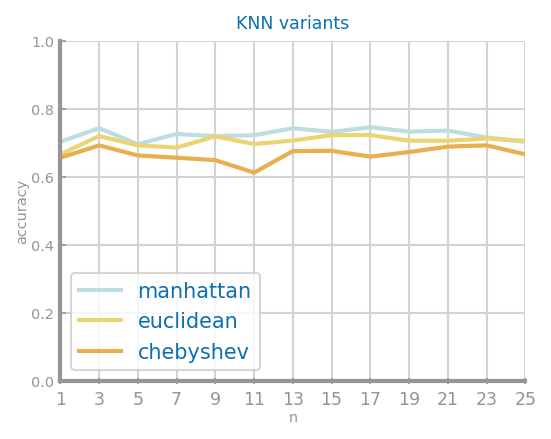

Best results with 17 neighbors and manhattan


In [53]:
values = {}
best = (0, '')
best_model = None
last_best = 0
dists = {'manhattan': None, 'euclidean':None, 'chebyshev':None}
for d in dist:
    b_f_d=["","",0]
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        scores = cross_val_score(knn, X, y, cv=kf)
        yvalues.append(scores.mean())
        if scores.mean() > last_best:
            best = (n, d)
            last_best = scores.mean()
            best_model
        if scores.mean() > b_f_d[2]:
            b_f_d = [n,knn,yvalues[-1]]
    dists[d] = b_f_d
    values[d] = yvalues

print(dists)
plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

For the manhattan distance best was 17 k with an acc of 74.56% 
Lets see how it did for each fold



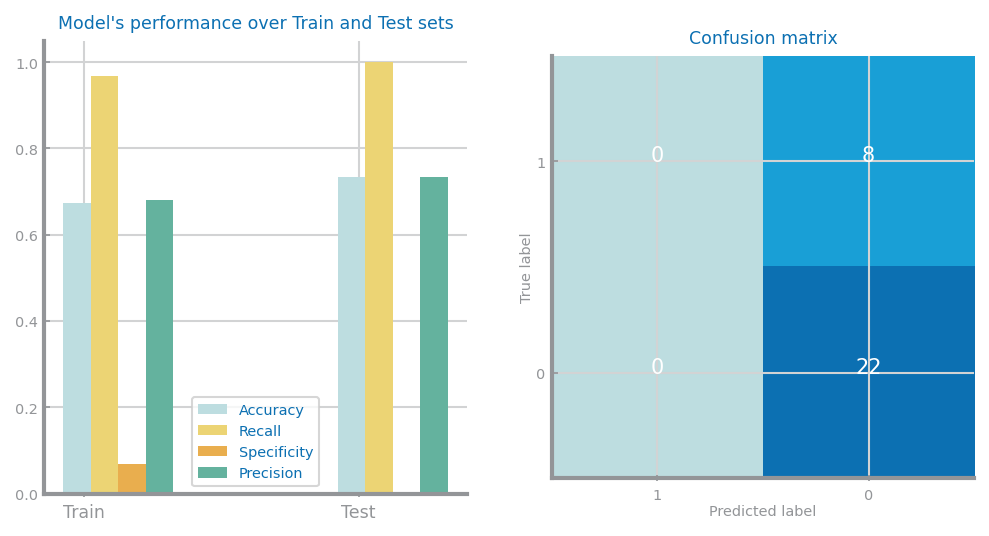

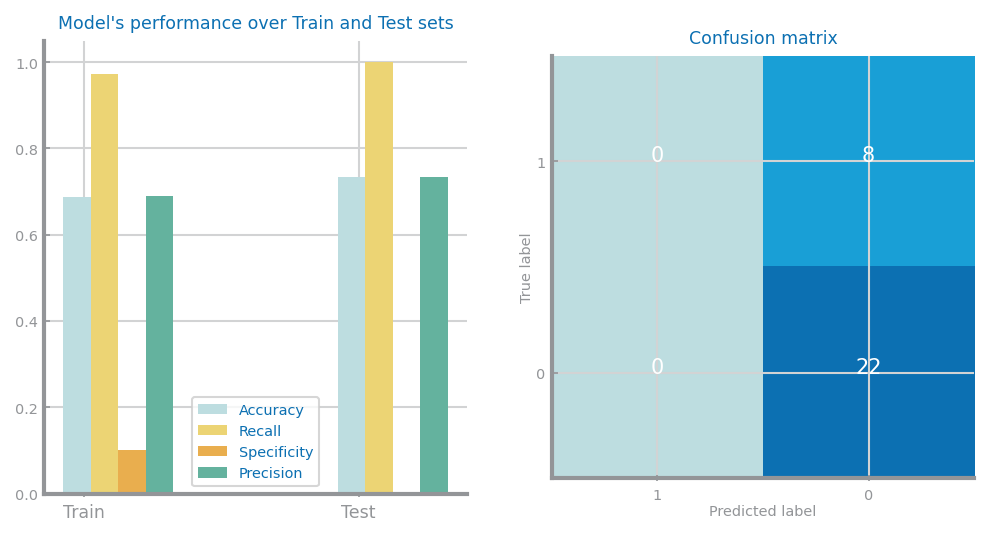

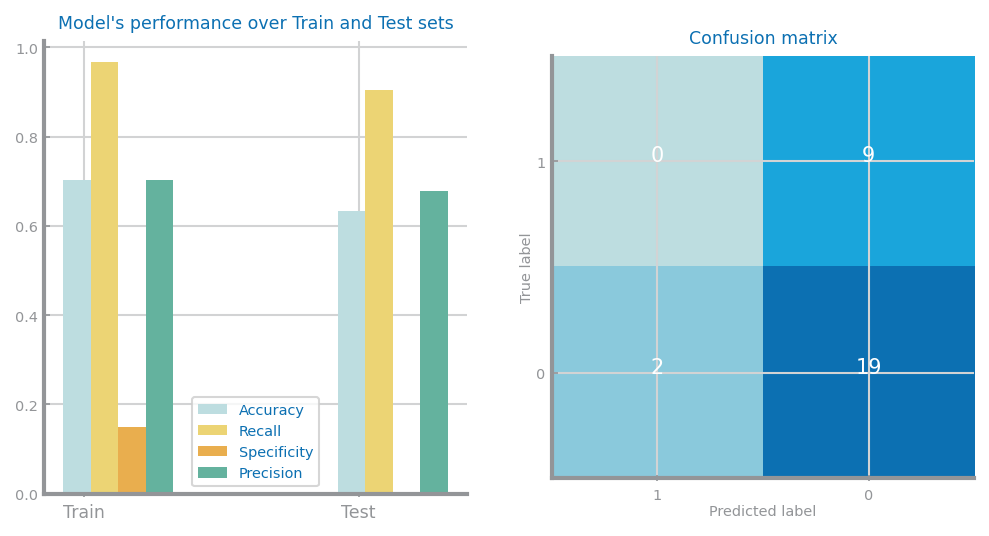

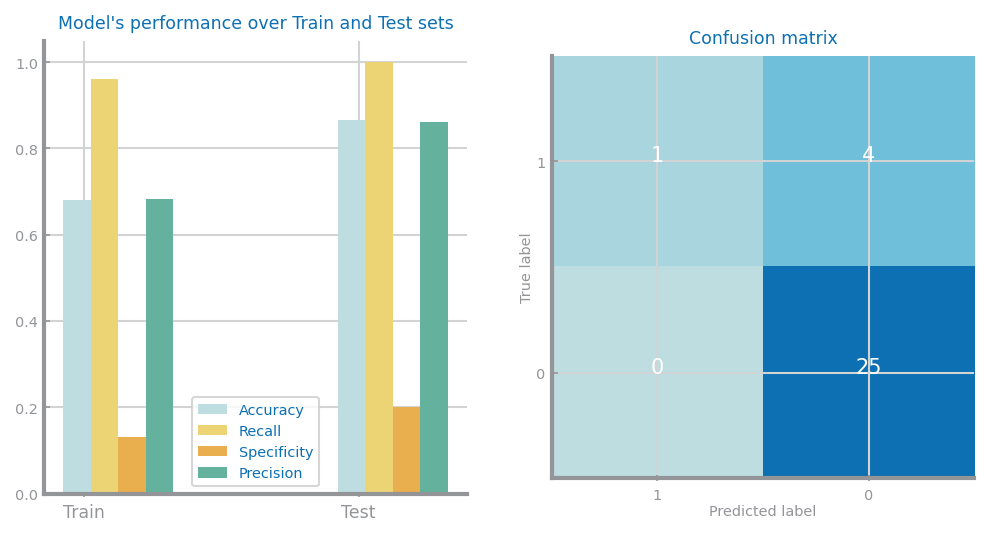

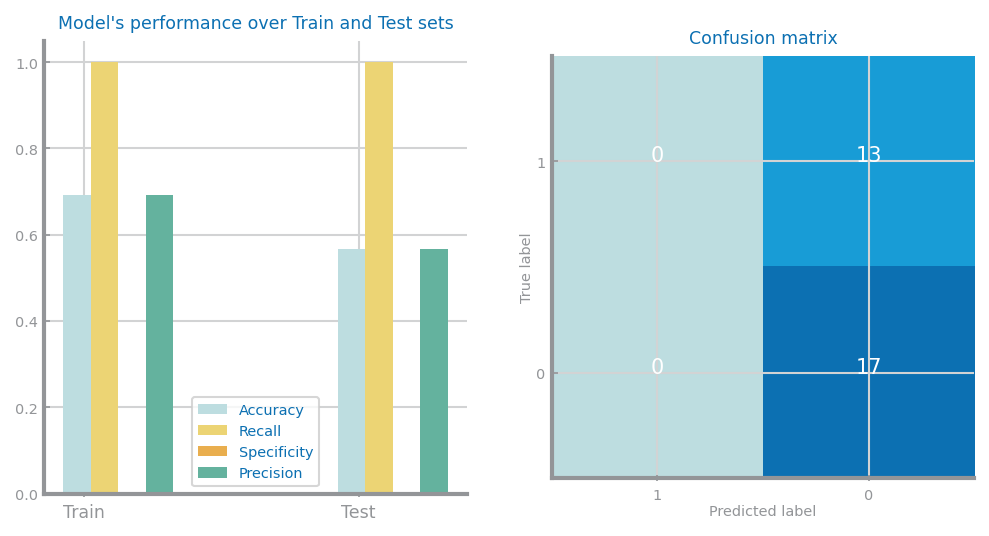

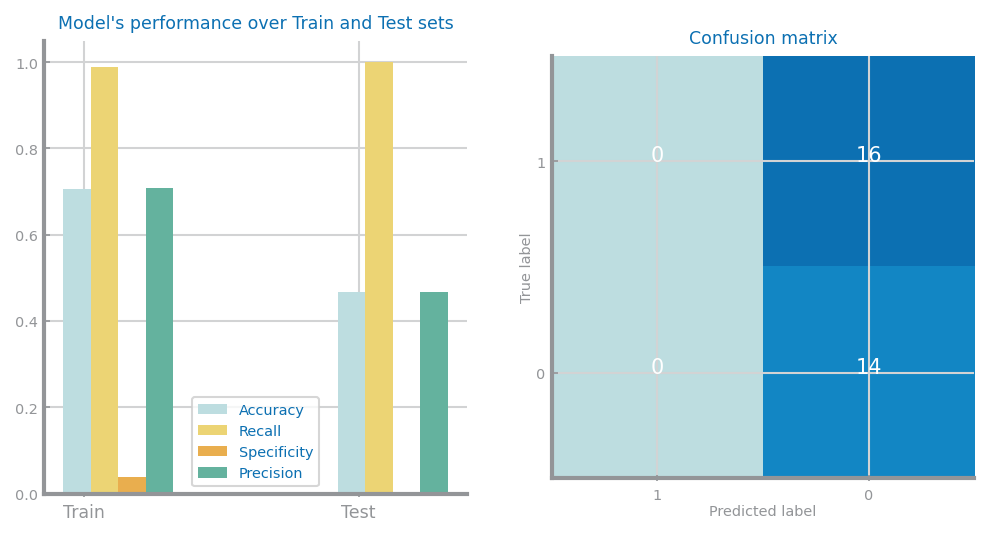

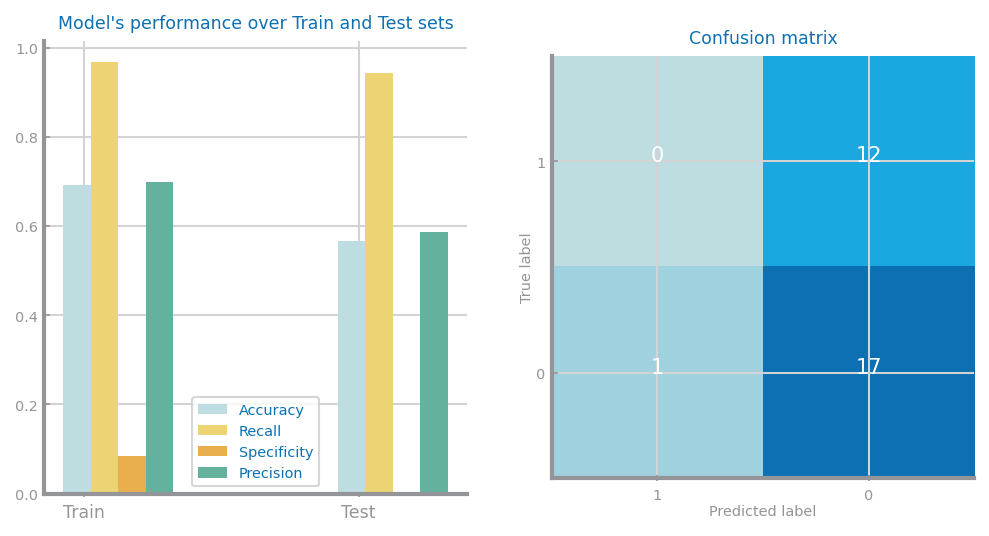

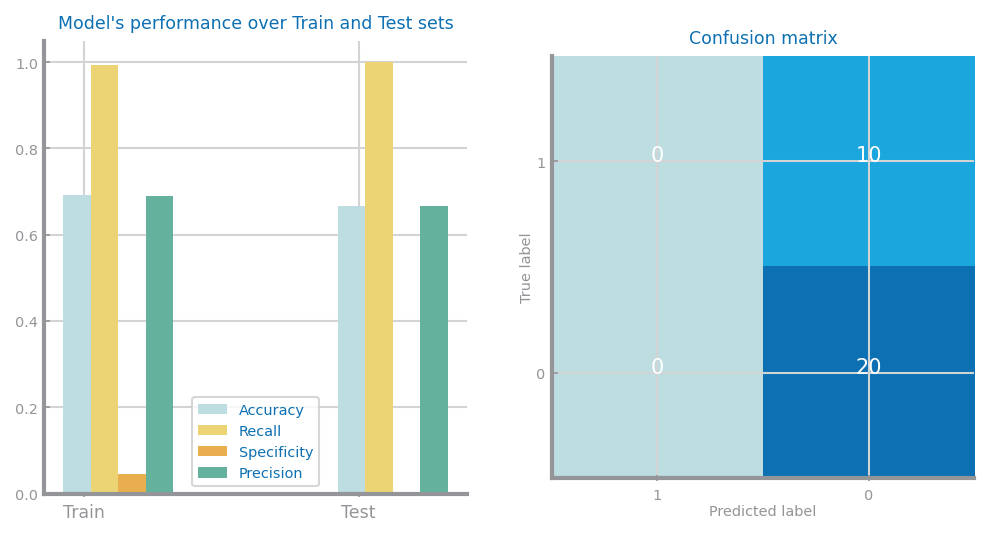

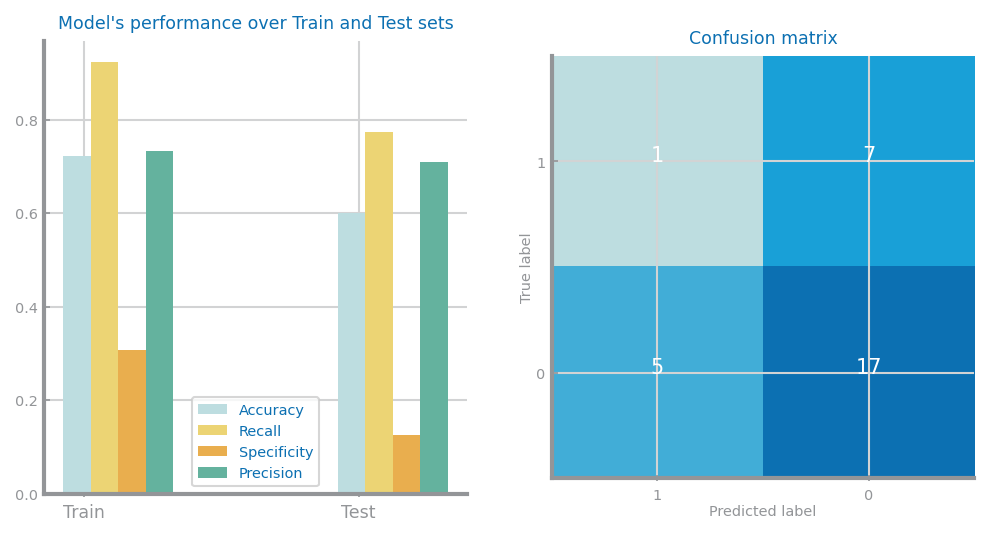

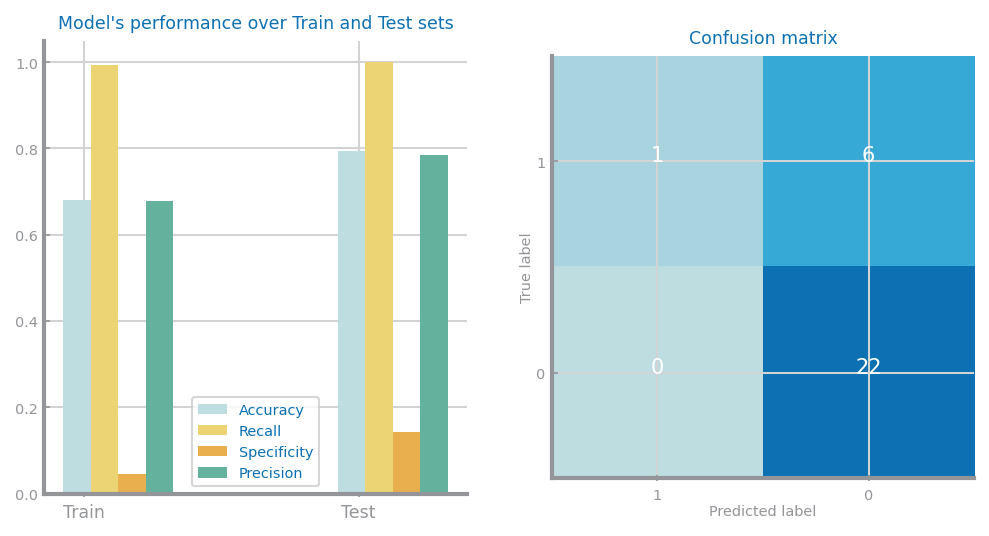

In [54]:

print("For the {} distance best was {} k with an acc of {:.2f}% ".format('manhattan', dists['manhattan'][0], dists['manhattan'][2]*100))
print("Lets see how it did for each fold\n")
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]

    knn = KNeighborsClassifier(n_neighbors=v[0], metric=k)
    knn.fit(trnX, trnY)
    prd_trn = knn.predict(trnX)
    prd_tst = knn.predict(tstX)

    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
    
    

For the euclidean distance best was 17 k with an acc of 72.26% 
Lets see how it did for each fold



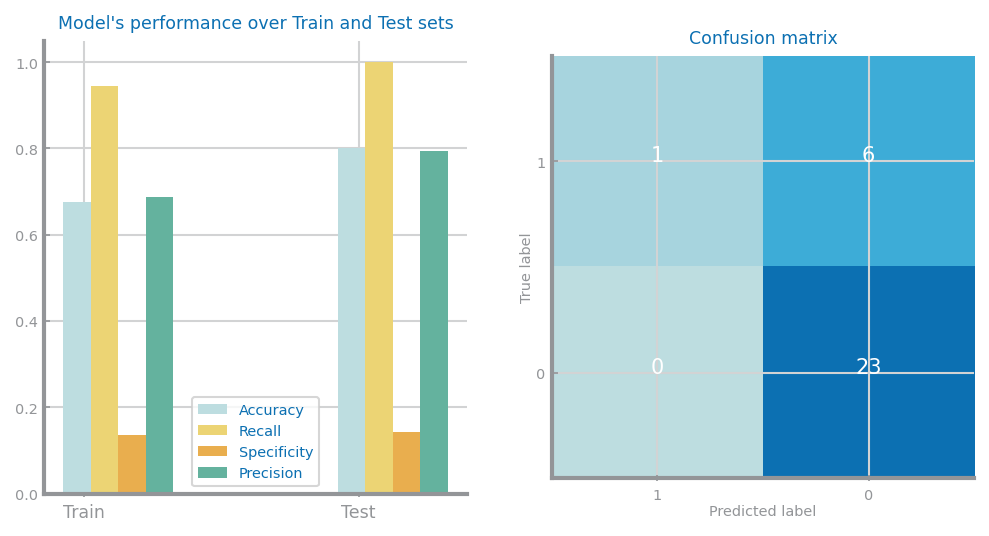

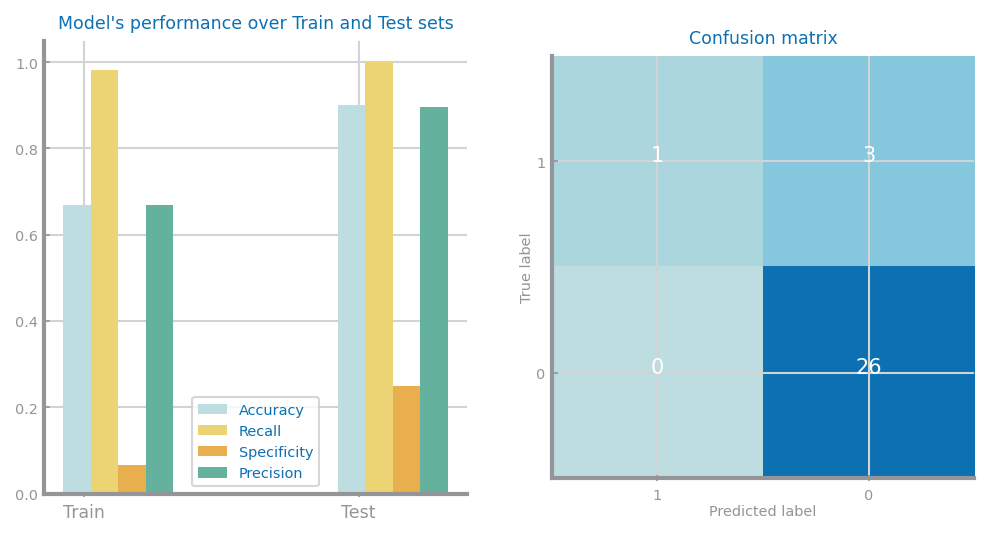

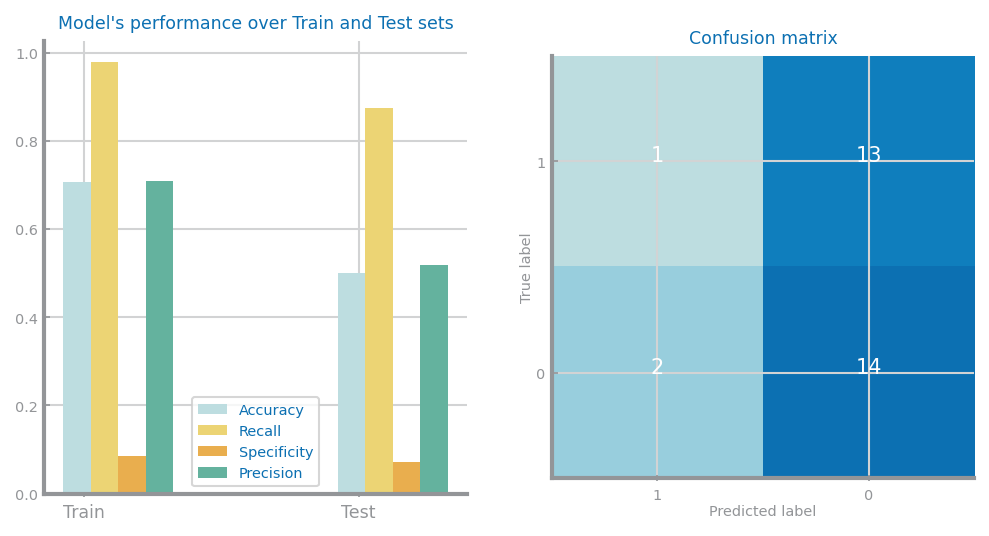

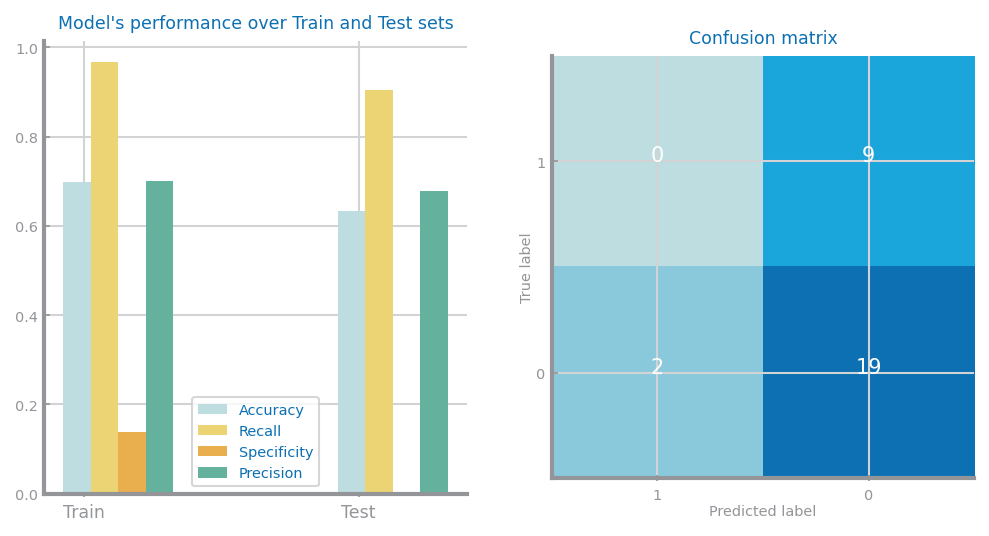

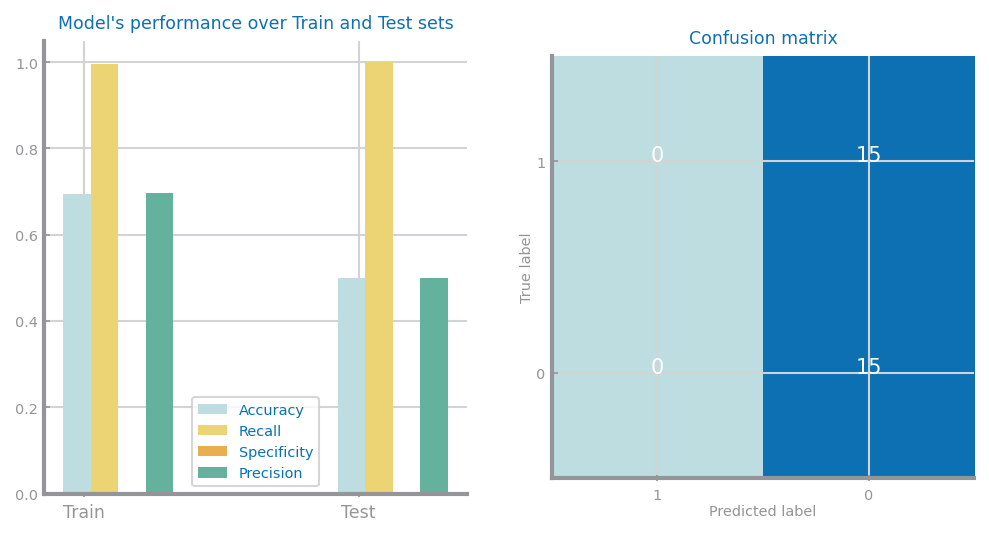

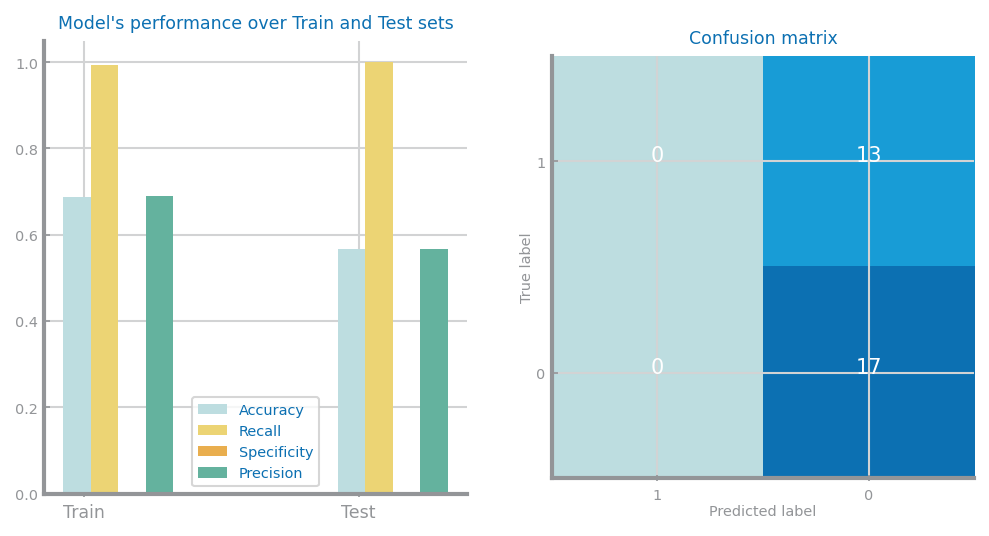

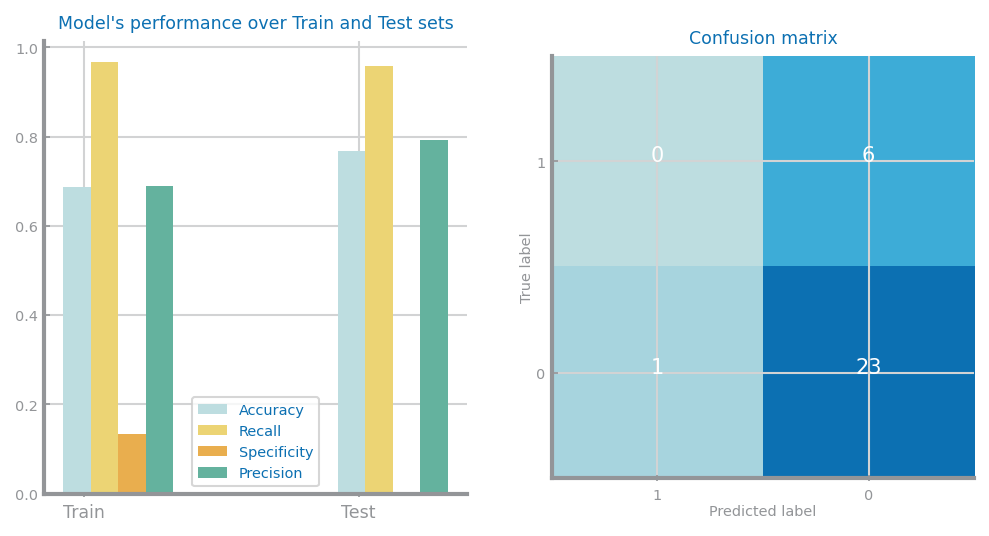

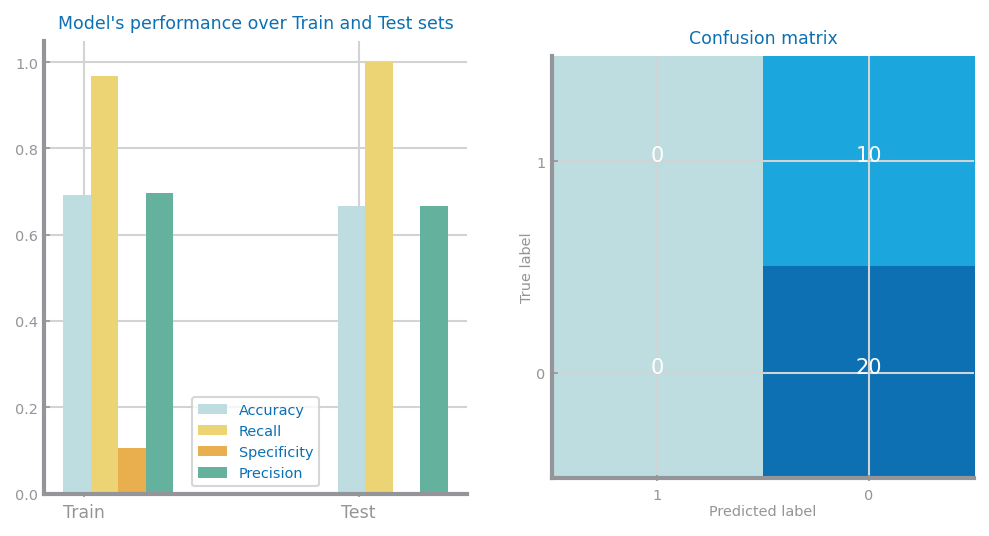

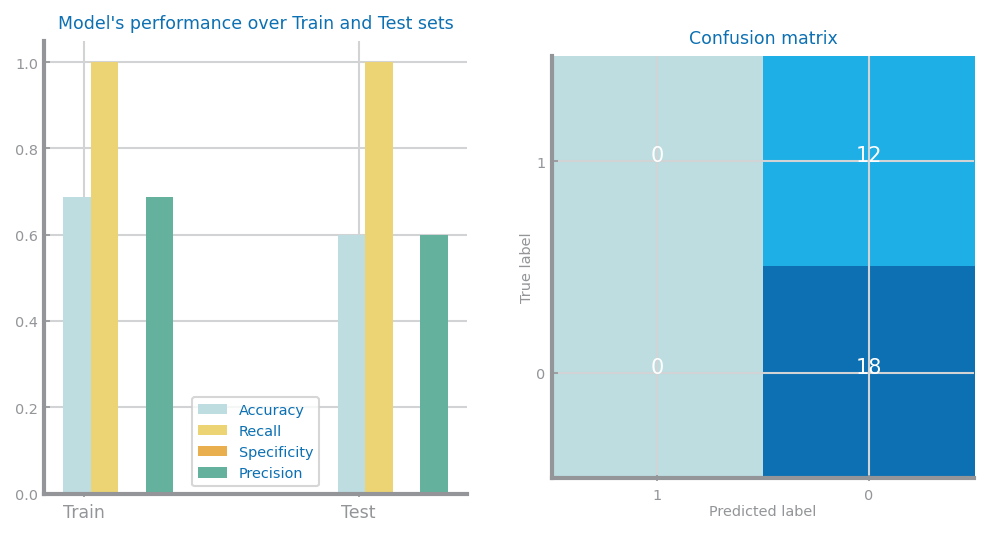

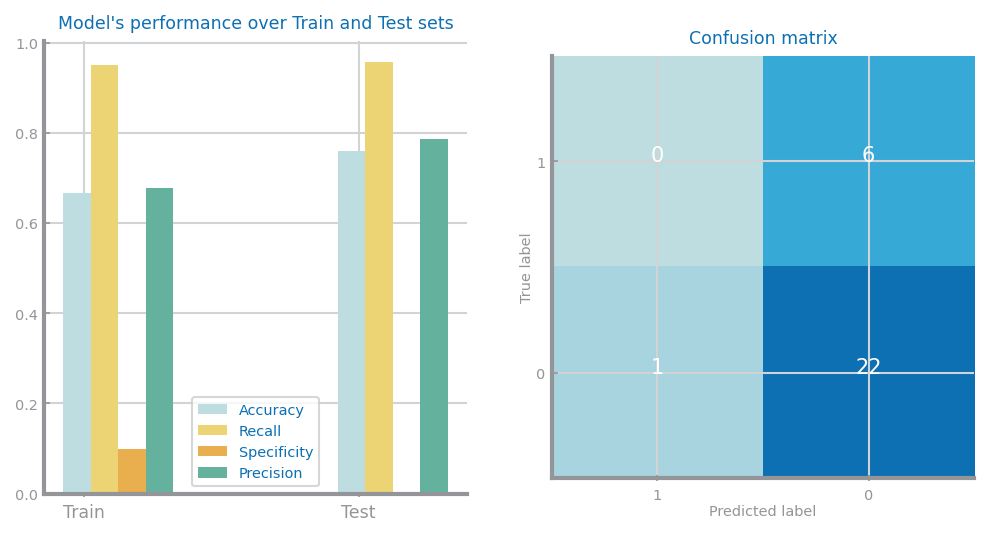

In [55]:

print("For the {} distance best was {} k with an acc of {:.2f}% ".format('euclidean', dists['euclidean'][0], dists['euclidean'][2]*100))
print("Lets see how it did for each fold\n")
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]

    knn = KNeighborsClassifier(n_neighbors=v[0], metric=k)
    knn.fit(trnX, trnY)
    prd_trn = knn.predict(trnX)
    prd_tst = knn.predict(tstX)

    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
   

For the chebyshev distance best was 23 k with an acc of 69.23% 
Lets see how it did for each fold



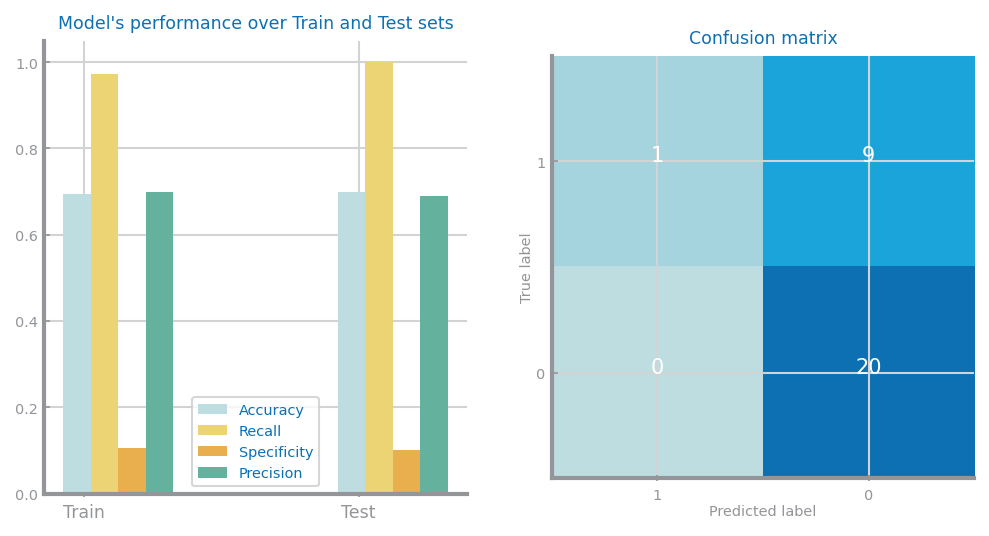

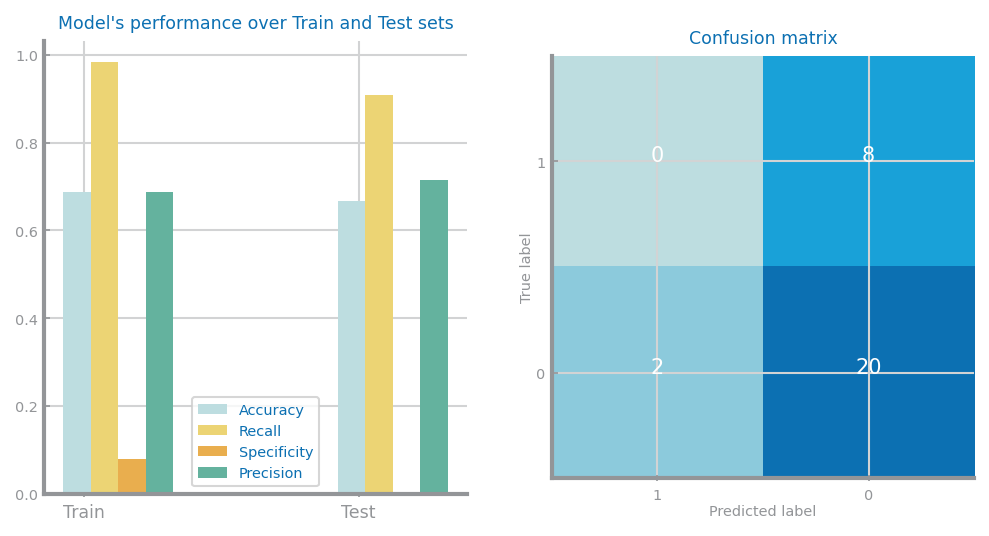

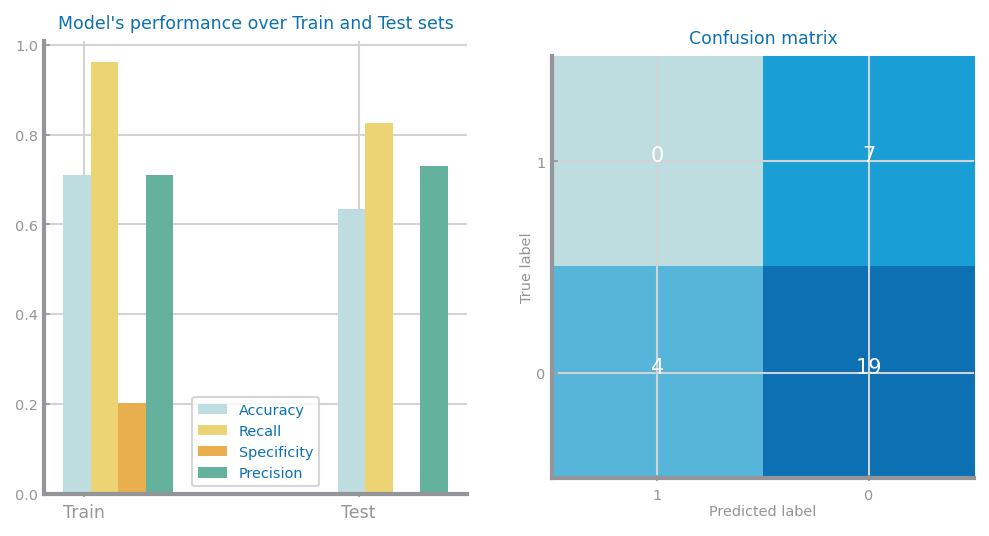

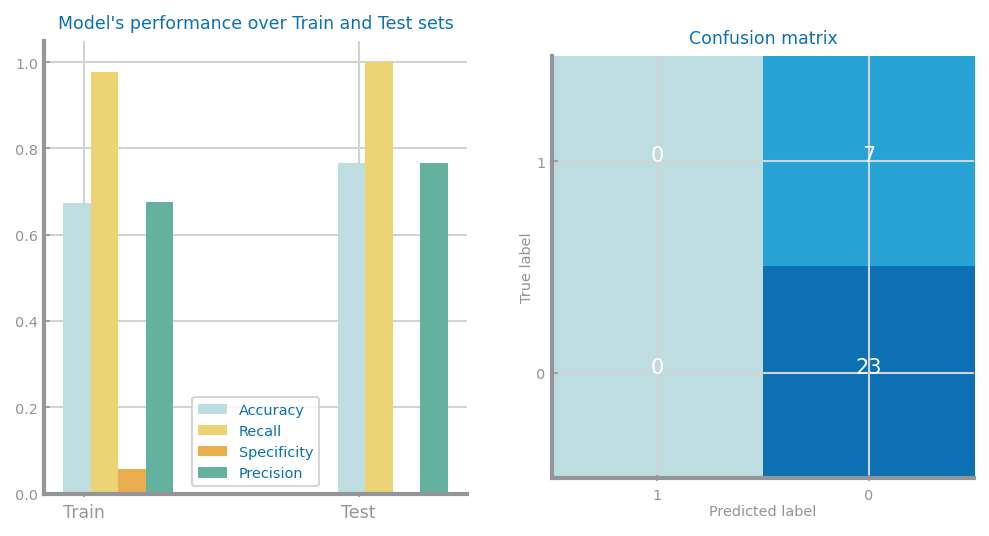

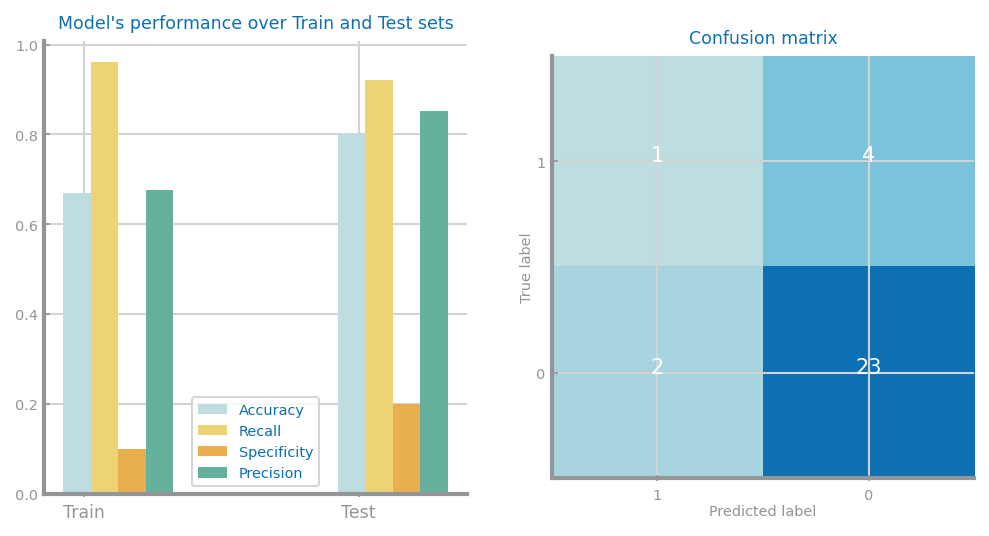

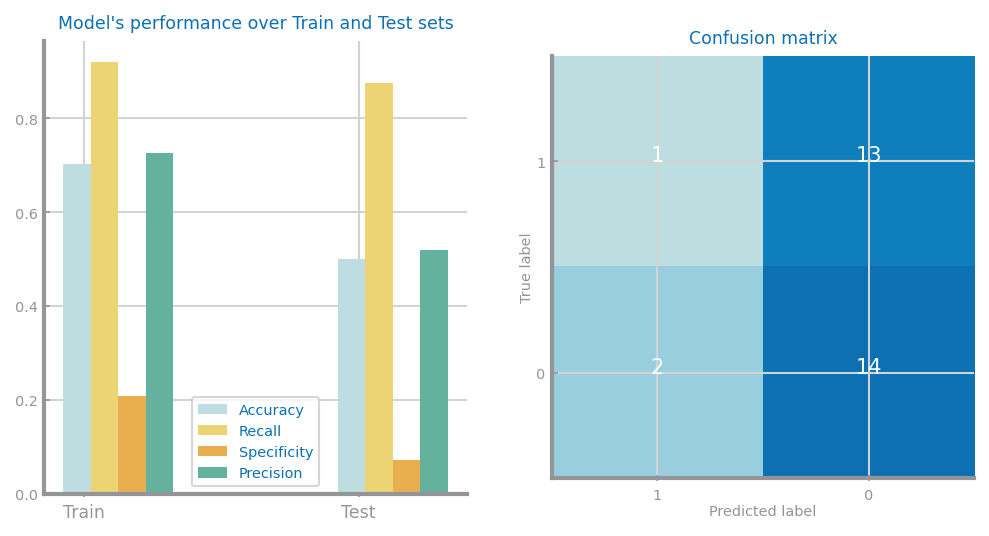

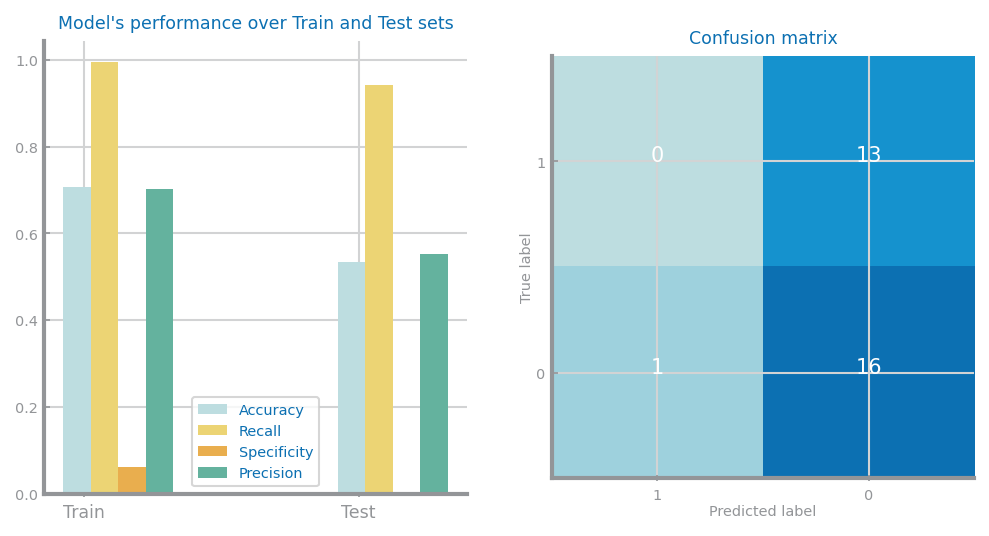

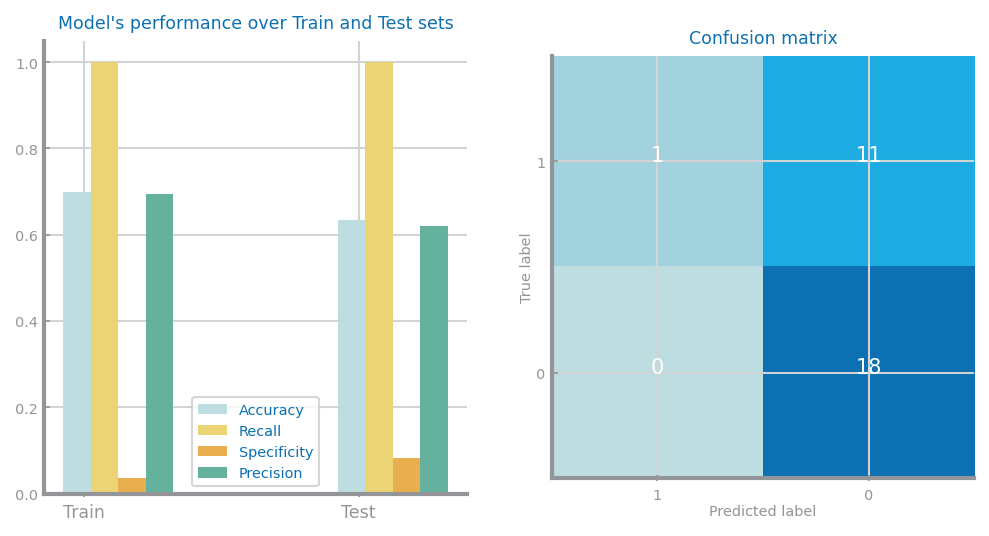

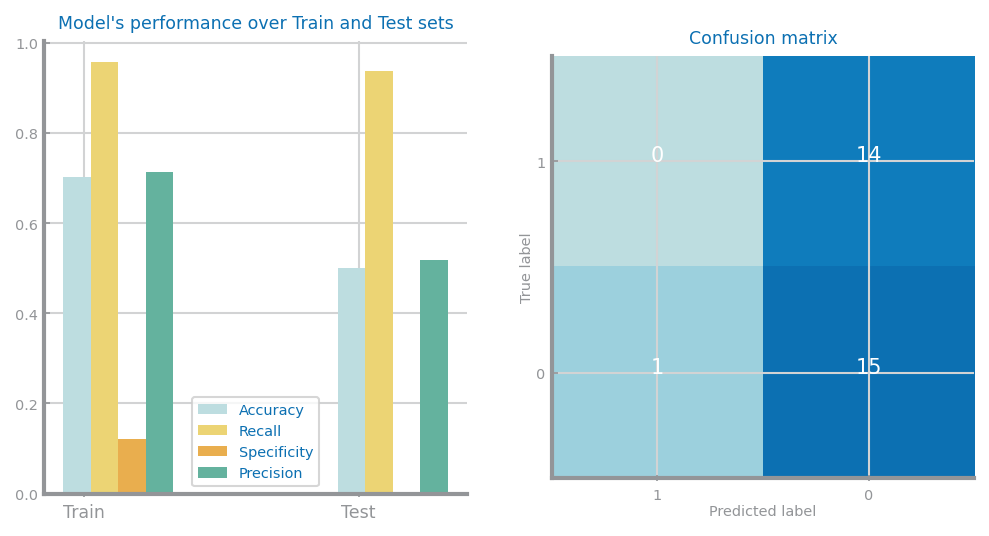

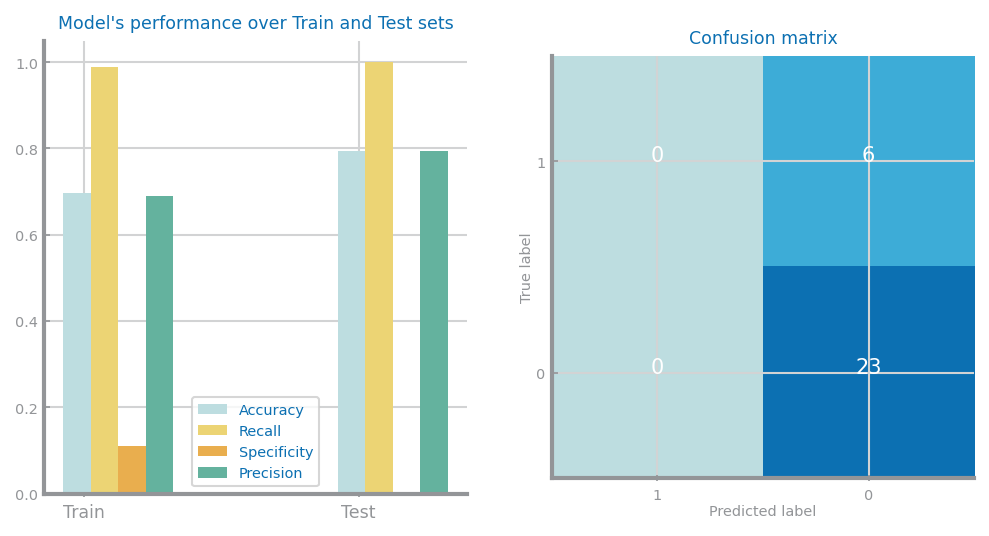

In [58]:

print("For the {} distance best was {} k with an acc of {:.2f}% ".format('chebyshev', dists['chebyshev'][0], dists['chebyshev'][2]*100))
print("Lets see how it did for each fold\n")
for train_index, test_index in kf.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]

    knn = KNeighborsClassifier(n_neighbors=v[0], metric=k)
    knn.fit(trnX, trnY)
    prd_trn = knn.predict(trnX)
    prd_tst = knn.predict(tstX)

    ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
   

Across all of the diatcnces, the results are now more reliable. This confirms that we should use k fold from now on instead of just the 70/30 split. 